# Analyse de survie ou fiabilisation : la d√©sertion bancaire
Akbar FAHARDINE &  Yacouba CISSE

# ‚ö†Ô∏è Attention 

Les tests ne sont pour la plupart **pas accept√©s** en raison des hypoth√®ses √©tablies. Cependant, nous avons choisi de les poursuivre **dans un but p√©dagogique**.

Merci de garder cela √† l'esprit lors de l'analyse des r√©sultats.


## 1) Introduction 

La d√©sertion des clients, √©galement appel√©e churn, repr√©sente un d√©fi crucial pour les entreprises de services financiers, notamment les banques. Lorsqu'un client quitte une banque, cela peut non seulement r√©duire les revenus, mais aussi affecter n√©gativement la r√©putation de l'institution. Pr√©voir ce comportement est donc essentiel pour que les banques puissent √©laborer des strat√©gies de fid√©lisation efficaces et maintenir leur rentabilit√© ainsi que leur croissance.

## 2) Probl√©matique choisie  
La question qui se pose alors est la suivante : **quels sont les √©l√©ments d√©terminants qui influencent la dur√©e pendant laquelle les clients restent fid√®les √† l'utilisation de leur carte de cr√©dit avant de cesser leur engagement aupr√®s de la banque ?** Identifier ces facteurs est crucial pour permettre aux banques de mettre en place des strat√©gies de r√©tention plus cibl√©es et efficaces. Cette √©tude se propose d‚Äôexplorer ces diff√©rents √©l√©ments √† travers une analyse approfondie, afin de mieux comprendre les comportements de d√©sertion des clients et d‚Äôam√©liorer les initiatives de fid√©lisation.t ? 

## 3) Int√©r√™t du sujet 

Conserver un client existant co√ªte g√©n√©ralement moins cher que d'en acqu√©rir un nouveau. En limitant la d√©sertion, les banques peuvent r√©duire leurs co√ªts d'acquisition tout en maximisant la valeur √† long terme de leur base de clients.

Conna√Ætre les √©l√©ments d√©terminants de la r√©tention permet de cibler plus efficacement les initiatives de fid√©lisation, telles que les offres promotionnelles, les programmes de r√©compense, ou les services personnalis√©s, en fonction des profils des clients les plus susceptibles de partir.

## 4) Description de notre Dataset 

Le dataset utilis√© dans ce projet a √©t√© obtenu √† partir du site https://www.kaggle.com/code/mohamedchahed/pr-diction-de-la-d-sertion-bancaire . Il s'agit d'un ensemble de donn√©es sur les clients d'une banque, contenant des informations telles que l'√¢ge, le salaire, l'√©tat matrimonial, la limite de la carte de cr√©dit, la cat√©gorie de carte de cr√©dit, Anciennet√© du Client,  etc.

Le dataset comprend plus de 10 000 clients, dont seulement 16,01% ont quitt√© la banque, ce qui rend la pr√©diction du churn des clients plus difficile en raison du d√©s√©quilibre de classe.


In [11]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter


In [12]:
from IPython.display import HTML

def toggle_code():
    display(HTML('''
        <script>
            code_show=true; 
            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            } 
            $( document ).ready(function(){code_toggle();});
        </script>
        <form action="javascript:code_toggle()">
            <input type="submit" value="Afficher/Masquer tout le Code">
        </form>
    '''))

toggle_code()


# II) Analyse exploratoire

## 1) Pr√©sentation des variables

In [17]:
#df = pd.read_csv("C:/Users/Scolaire/Documents/Analyse de survie/BankChurners.csv",sep =';')
df = pd.read_csv("BankChurners.csv",sep =';')

In [19]:
df.rename(columns={
    'CLIENTNUM': 'Numero_Client',
    'Attrition_Flag': 'Indicateur_Attrition',
    'Customer_Age': 'Age_Client',
    'Gender': 'Sexe_Client',
    'Dependent_count': 'Nombre_Personnes_Charge',
    'Education_Level': 'Niveau_Education',
    'Marital_Status': 'Statut_Matrimonial',
    'Income_Category': 'Categorie_Revenu',
    'Card_Category': 'Categorie_Carte',
    'Months_on_book': 'Anciennete_Client',
    'Total_Relationship_Count': 'Nombre_Relations_Totales',
    'Months_Inactive_12_mon': 'Nombre_Mois_Inactifs_12m',
    'Contacts_Count_12_mon': 'Nombre_Contacts_12m',
    'Credit_Limit': 'Limite_Credit',
    'Total_Revolving_Bal': 'Solde_Revolving_Total',
    'Avg_Open_To_Buy': 'Montant_Moyen_Disponible',
    'Total_Amt_Chng_Q4_Q1': 'Taux_Evolution_Transactions_Q4_Q1',
    'Total_Trans_Amt': 'Montant_Total_Transactions',
    'Total_Trans_Ct': 'Nombre_Total_Transactions',
    'Total_Ct_Chng_Q4_Q1': 'Taux_Evolution_Nombre_Transactions_Q4_Q1',
    'Avg_Utilization_Ratio': 'Ratio_Moyen_Utilisation'
}, inplace=True)


In [21]:
# V√©rifier s'il y a des valeurs manquantes dans l'ensemble du DataFrame
valeurs_manquantes = df.isnull().values.any()

if valeurs_manquantes:
    print("Il y a des valeurs manquantes dans le DataFrame.")
else:
    print("Aucune valeur manquante dans le DataFrame.")


Aucune valeur manquante dans le DataFrame.


Notre jeu de donn√©es

Notre jeu de donn√©es comprend **10127 observations** et **20 variables** dont 15 quantitatives et 5 qualitatives.

Variables Quantitatives

| Variable                                    | Description                                                                                      |
|---------------------------------------------|--------------------------------------------------------------------------------------------------|
| Numero_Client                               | Qui est le num√©ro de chaque client.                                                             |
| Age_Client                                  | L'√¢ge des clients.                                                                               |
| Nombre_Personnes_Charge                     | Nombre de personnes √† charge.                                                                    |
| Anciennete_Client                           | Nombre de mois en relation avec la banque.                                                       |
| Nombre_Relations_Totales                    | Nombre total de relations avec la banque.                                                        |
| Nombre_Mois_Inactifs_12m                    | Nombre de mois d'inactivit√©.                                                                     |
| Nombre_Contacts_12m                         | Nombre de contacts sur 12 mois.                                                                  |
| Limite_Cr√©dit                               | Limite de cr√©dit.                                                                                |
| Solde_Revolving_Total                        | Solde revolving total.                                                                           |
| Montant_Moyen_Disponible                    | Montant moyen disponible pour les d√©penses.                                                     |
| Taux_√âvolution_Transactions_Q4_Q1          | Taux de variation des transactions (T4-T1).                                                     |
| Montant_Total_Transactions                   | Montant total des transactions.                                                                   |
| Nombre_Total_Transactions                    | Nombre total de transactions.                                                                    |
| Taux_√âvolution_Nombre_Transactions_Q4_Q1   | Taux de variation du nombre de transactions (T4-T1).                                            |
| Ratio_Moyen_Utilisation                     | Ratio moyen d‚Äôutilisation du cr√©dit.                                                             |

Variables Qualitatives

| Variable              | Description                                               |
|-----------------------|----------------------------------------------------------|
| Indicateur_Attrition  | Permet de savoir si le client a d√©sert√© la banque ou pas. |
| Niveau_Education      | Niveau d'√©ducation du client.                            |
| Statut_Matrimonial    | Situation matrimoniale du client.                        |
| Categorie_Revenu      | Cat√©gorie de revenu du client.                           |
| Categorie_Carte       | Cat√©gorie de la carte de cr√©dit.                         |


Notre **variable de temps** est la variable **Anciennet√©_Client** repr√©sentant ici le nombre de mois en relation avec la banque.

Et la **variable d'√©v√©nement** est la variable **Indicateur_Attribution** qui repr√©sente si le clients √† d√©sert√© ou pas de la banque.

## 2) R√©presentation graphique 

### 2.1) Variables num√©riques

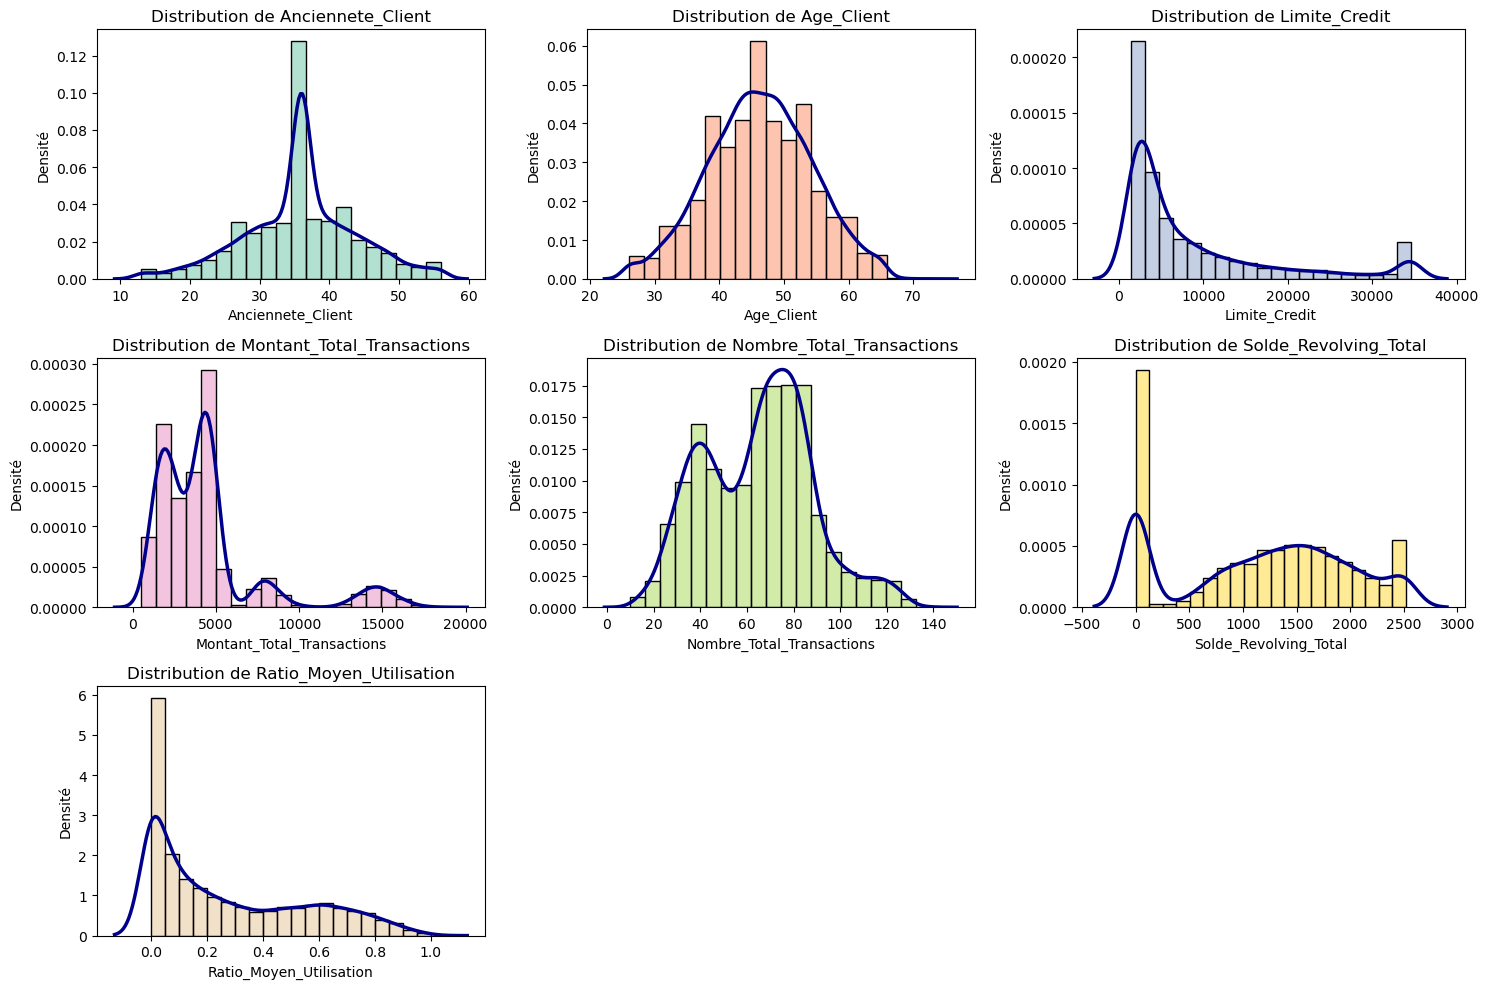

In [26]:
# Liste des variables num√©riques pour tracer des histogrammes
numerical_vars = ['Anciennete_Client', 'Age_Client', 'Limite_Credit', 'Montant_Total_Transactions', 
                  'Nombre_Total_Transactions', 'Solde_Revolving_Total', 'Ratio_Moyen_Utilisation']

# Liste des variables cat√©gorielles pour les diagrammes en barres
categorical_vars = ['Indicateur_Attrition', 'Sexe_Client', 'Niveau_Education', 'Statut_Matrimonial', 'Categorie_Revenu']

# Palette de couleurs pour les histogrammes
colors = sns.color_palette("Set2", len(numerical_vars))

#  Histogrammes et densit√©s correspondantes
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins=20, kde=True, color=colors[i-1], stat="density")
    sns.kdeplot(df[var], color="darkblue", linewidth=2.5)
    plt.title(f"Distribution de {var}", fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Densit√©", fontsize=10)
plt.tight_layout()
plt.show()

les variables **Anciennete_Client** et **Age_Client** pr√©sentent des caract√©ristiques qui s'apparentent √† des distributions normales.

- **Anciennet√©_Client** :

  
	‚Ä¢	Distribution centr√©e autour de 30 √† 40 ans d‚Äôanciennet√©.

	‚Ä¢	Cela sugg√®re que la plupart des clients ont une fid√©lit√© moyenne √† longue √† la banque.

	‚Ä¢	Les clients tr√®s r√©cents ou tr√®s anciens sont minoritaires.

- **√Çge_Client** :

  
	‚Ä¢	Distribution presque normale, centr√©e autour de 40 √† 50 ans.


	‚Ä¢	Les clients semblent majoritairement d‚Äô√¢ge moyen, avec peu de clients tr√®s jeunes ou tr√®s √¢g√©s.


- **Limite_Cr√©dit** :

  
	‚Ä¢	Fort d√©s√©quilibre, avec une majorit√© de clients ayant des limites de cr√©dit relativement faibles.


	‚Ä¢	Quelques valeurs √©lev√©es (peut-√™tre des outliers) apparaissent autour de 30 000 √† 40 000.


- **Montant_Total_Transactions** :

  
	‚Ä¢	Bimodalit√© √©vidente : deux groupes dominants de clients d√©pensant autour de 5 000 et 10 000.


	‚Ä¢	Cela pourrait repr√©senter diff√©rents segments de clients selon leur comportement financier.


- **Nombre_Total_Transactions** :

  
	‚Ä¢	Distribution √©galement bimodale, avec des pics autour de 50 √† 80 transactions.


	‚Ä¢	Cela pourrait refl√©ter des comportements distincts : utilisateurs peu actifs vs actifs r√©guliers.


- **Solde_Revolving_Total** :

  
	‚Ä¢	Distribution tr√®s asym√©trique avec un pic important autour de z√©ro.


	‚Ä¢	Cela pourrait indiquer que la plupart des clients ne portent pas de solde sur leur carte (peut-√™tre des payeurs en totalit√© chaque mois).


- **Ratio_Moyen_Utilisation** :

  
	‚Ä¢	Distribution fortement concentr√©e autour de 0 (faible utilisation moyenne des limites de cr√©dit).


	‚Ä¢	Une minorit√© semble utiliser leur cr√©dit de mani√®re plus intensive (> 0.5).


### 2.2) Variables cat√©gorielles

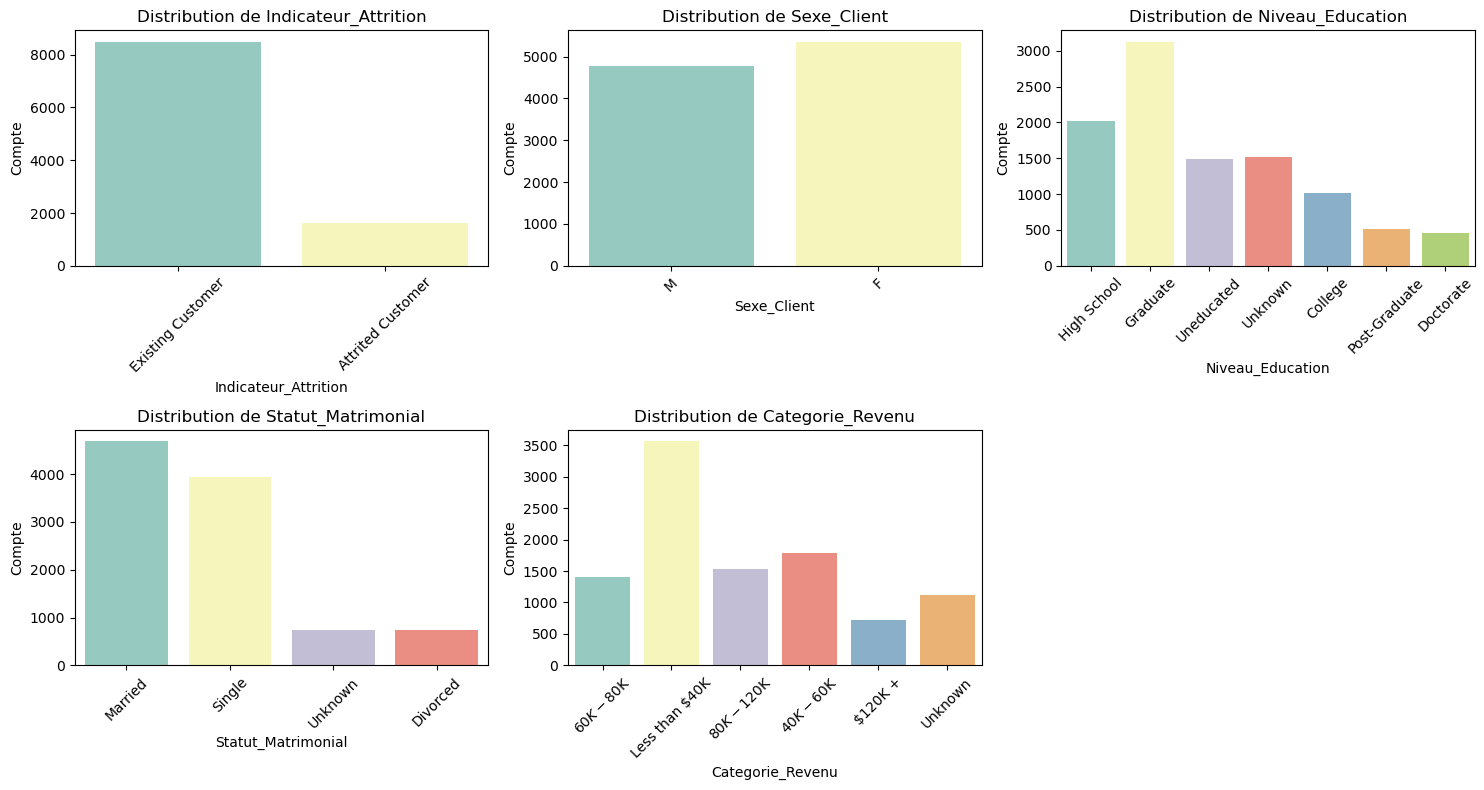

In [30]:
# Liste des variables cat√©gorielles pour les diagrammes en barres
categorical_vars = ['Indicateur_Attrition', 'Sexe_Client', 'Niveau_Education', 'Statut_Matrimonial', 'Categorie_Revenu']

# Trace les diagrammes en barres pour les variables cat√©gorielles
plt.figure(figsize=(15, 8))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)

    # Obtenir le nombre de cat√©gories uniques
    unique_categories = df[var].nunique()
    #   Palette de couleurs qui correspond au nombre de cat√©gories
    bar_colors = sns.color_palette("Set3", n_colors=unique_categories)

    # Les diagrammes en barres en utilisant hue pour √©viter les avertissements
    sns.countplot(data=df, x=var, palette=bar_colors, hue=df[var].astype(str), legend=False)  # Ajout de hue avec la variable comme string

    plt.title(f"Distribution de {var}", fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Compte", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- **Indicateur_Attrition** :

	‚Ä¢ La majorit√© des clients (plus de 80 %) sont toujours actifs (‚ÄúExisting Customers‚Äù), tandis qu‚Äôune minorit√© est partie (‚ÄúAttrited Customers‚Äù).
    
- **Sexe_Client** :

	‚Ä¢ Les proportions hommes (M) et femmes (F) sont presque √©quilibr√©es, avec une l√©g√®re surrepr√©sentation des femmes.
	
- **Niveau_Education** :

	‚Ä¢	La cat√©gorie ‚ÄúGraduate‚Äù est la plus repr√©sent√©e, suivie de ‚ÄúHigh School‚Äù et ‚ÄúUnknown‚Äù. Les niveaux ‚ÄúDoctorate‚Äù et ‚ÄúPost-Graduate‚Äù sont les moins fr√©quents.
	
- **Statut_Matrimonial** :

  
	‚Ä¢	Les clients mari√©s sont les plus repr√©sent√©s, suivis des c√©libataires. Les statuts ‚ÄúUnknown‚Äù et ‚ÄúDivorced‚Äù sont minoritaires.
	
- **Categorie_Revenu** :

	‚Ä¢ La majorit√© des clients se situe dans la tranche de revenu ‚ÄúLess than $40K‚Äù, suivie de ‚Äú60K‚Äì80K‚Äù et ‚Äú80K‚Äì120K‚Äù. La cat√©gorie ‚ÄúUnknown‚Äù est minoritaire.
	

# III) Probl√®me de censure 

## 1) D√©finition et pr√©sentation des diff√©rentes types de censure 

La variable de censure est une variable binaire qui identifie si l'√©v√©nement √©tudi√© (dans notre cas la d√©sertion d'un client) a √©t√© observ√© ou non pour un individu.

Il existe principalement trois types de censure :

**Censure √† droite** : L'√©v√©nement d'int√©r√™t n'a pas encore eu lieu au moment o√π l'√©tude se termine. Par exemple, un client est encore actif √† la fin de la p√©riode d'√©tude, donc le moment o√π il pourrait quitter la banque est inconnu.

**Censure √† gauche** : On sait que l'√©v√©nement s'est produit avant un certain temps, mais on ne conna√Æt pas le moment exact.

**Censure par intervalle** : L'√©v√©nement s'est produit dans un intervalle de temps, mais le moment pr√©cis reste inconnu.

Dans notre cas nous avons une **censure √† droite**.


## 2) Cr√©ation de la variable censure et Sexe_Client

Nous avons **83.9%** des clients qui n'ont pas quitt√© la banque et **16.1%** des clients qui ont quitt√© la banque. Les clients qui n'ont pas quitt√© la banque correspondent a nos donn√©es censur√©es. Nous avons donc cr√©e une variables censur√©e qui prend pour valeur 0 si le client n'a pas quitt√© la banque et 1 s'il a quitt√© la banque. 

**0 pour la censure**

**1 pour la non censure**

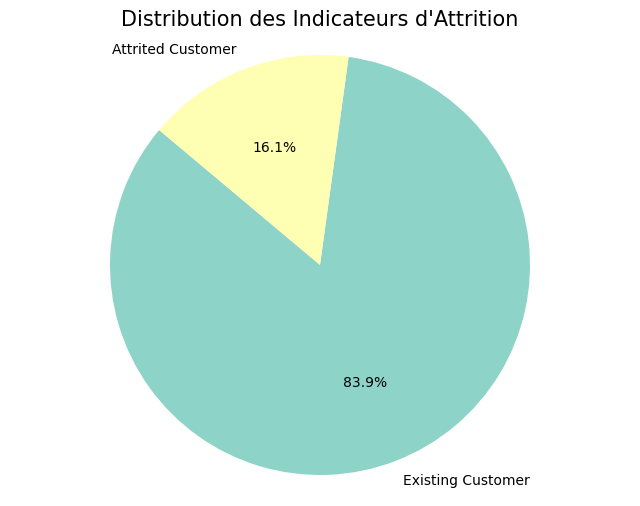

In [38]:
# Calculer les comptes et les pourcentages
attrition_counts = df['Indicateur_Attrition'].value_counts()
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

# Cr√©ation de la variable Censure
df['Censure'] = np.where(df['Indicateur_Attrition'] == 'Existing Customer', 0, 1)

# Recoder la variable Sexe_Client : F -> 0, M -> 1
df['Sexe_Client'] = df['Sexe_Client'].map({'F': 0, 'M': 1})
# Cr√©ation du diagramme en cercle
plt.figure(figsize=(8, 6))
plt.pie(attrition_percentages, labels=attrition_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

# Titre du diagramme
plt.title('Distribution des Indicateurs d\'Attrition', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le cercle est dessin√© comme un cercle
plt.show()

# IV) Mod√©lisation non parametrique

## 1) D√©finition des fonctions

| Estimateur | Formule | Description |
|:-----:|------------------------|------------------|
| $T$  |  | variable al√©atoire associ√©e au temps de survie.<br> Elle mesure le temps √©coul√© jusqu'√† ce que le Client quitte la banque.<br>Dans notre cas la variable de temps sera **Anciennete_Client**|
| $S(t)$ | $$S(t)=P(T > t)$$ | Elle repr√©sente la probabilit√© qu'un client ne quitte pas la banque au-del√† d‚Äôun instant t donn√©. Autrement dit, **elle mesure la riseque que le temps jusqu'au d√©pard d'un client soit sup√©rieur √† t**. <br>. |
| $h(t)$ | $$h(t) = \dfrac{f(t)} {S(t)}$$ | f(t)  est la densit√© de probabilit√© de  T  (la probabilit√© que  T  soit √©gal √†  t ). <br>En d'autres termes,  **h(t)  repr√©sente la risque instantan√©e qu'un individu quitte la banque au mois t sachant qu'il est rest√© actif jusque l√†**. |
| $H(t)$ | $$H(t) = \int_0^t h(u) du = -ln(S(t))$$ | La fonction de hasard est l'int√©grale de la fonction de risque  h(t) .<br>  **H(t)  repr√©sente le risque cumulatif des clients qui quittent la banque jusqu'au mois t**.|

## 2) Estimation des fonction : Kaplan Meier

### A) La fonction de survie S(t) 

| **Estimateur de la fonction de survie \( S(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|-----------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                         | $ \hat{S}(t) = \frac{n(t)}{n_0} $                  | $ \hat{S}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right) $ |
| **Description**                                     | Elle repr√©sente la probabilit√© qu'un client ne quitte pas la banque au-del√† d‚Äôun instant $ t $ donn√©.      | Estimateur de Kaplan-Meier, tenant compte des individus censur√©s. |
| **Propri√©t√©s**                                      | - **Non biais√©**. <br> - **Consistant** pour grands √©chantillons. | - **Non biais√©** sous censure al√©atoire. <br> - **Consistant** et **asymptotiquement normal**. |
| **Variance**                                        | Non applicable (formule simple).                     | Variance estim√©e par Greenwood : <br> $ \text{Var}(\hat{S}(t)) = \hat{S}(t)^2 \sum_{t_i \leq t} \frac{d_i}{n_i (n_i - d_i)} $ |


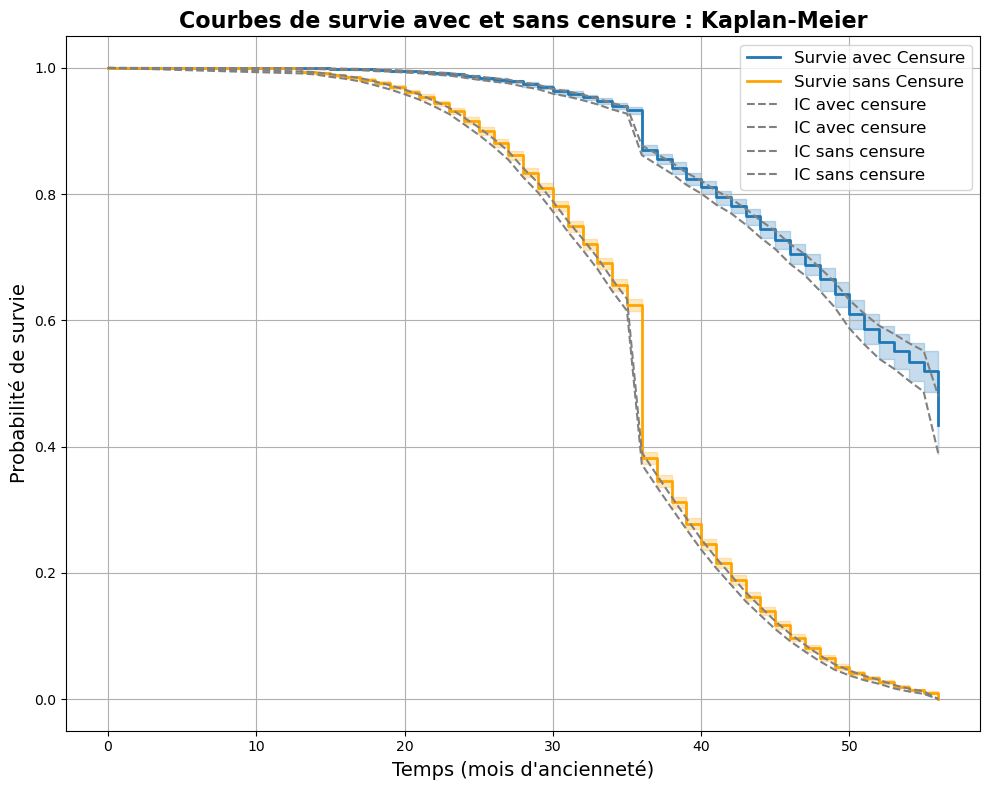

In [46]:
# Instancier le Kaplan-Meier Fitter pour les deux cas (avec et sans censure)
kmf_censure = KaplanMeierFitter()
kmf_nCensure = KaplanMeierFitter()
# Ajuster les mod√®les
kmf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
kmf_nCensure.fit(durations=df['Anciennete_Client'])  # Sans censure (ignorer les censures)

# Cr√©er la figure et l'axe pour la courbe de survie
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Tracer la courbe de survie avec censure
kmf_censure.plot(ax=ax, ci_show=True, label='Survie avec Censure', linewidth=2)

# Tracer la courbe de survie sans censure
kmf_nCensure.plot(ax=ax, ci_show=True, color='orange', label='Survie sans Censure', linewidth=2)

confidence_interval_censure = kmf_censure.confidence_interval_
plt.plot(confidence_interval_censure, color='gray',linestyle='--', label="IC avec censure")
confidence_interval = kmf_nCensure.confidence_interval_
plt.plot(confidence_interval, color='grey',linestyle='--', label="IC sans censure")

# Titre et labels pour l'axe de la survie
plt.title("Courbes de survie avec et sans censure : Kaplan-Meier", fontsize=16, fontweight='bold')
plt.xlabel("Temps (mois d'anciennet√©)", fontsize=14)
plt.ylabel("Probabilit√© de survie", fontsize=14)

# Ajouter une grille pour am√©liorer la lisibilit√©
plt.grid(True)

# Ajouter une l√©gende pour diff√©rencier les deux courbes
plt.legend(loc='best', fontsize=12)

# Afficher la courbe
plt.tight_layout()
plt.show()


- La probabilit√© de survie diminue progressivement au fil du temps.
- Les courbes ‚Äúavec censure‚Äù et ‚Äúsans censure‚Äù sont similaires, mais la censure semble l√©g√®rement r√©duire l‚Äôincertitude des intervalles de confiance.
- **la chute observ√©e autour de 37 mois** correspond √† une proportion plus √©lev√©e de clients quittant la banque, car il y a simplement plus de clients dans cette tranche temporelle.
- La probabilit√© de survie avec censure est environ **10-15 %** plus √©lev√©e que celle sans censure √† ce moment critique.

## Explication du pic dans notre fonction de survie

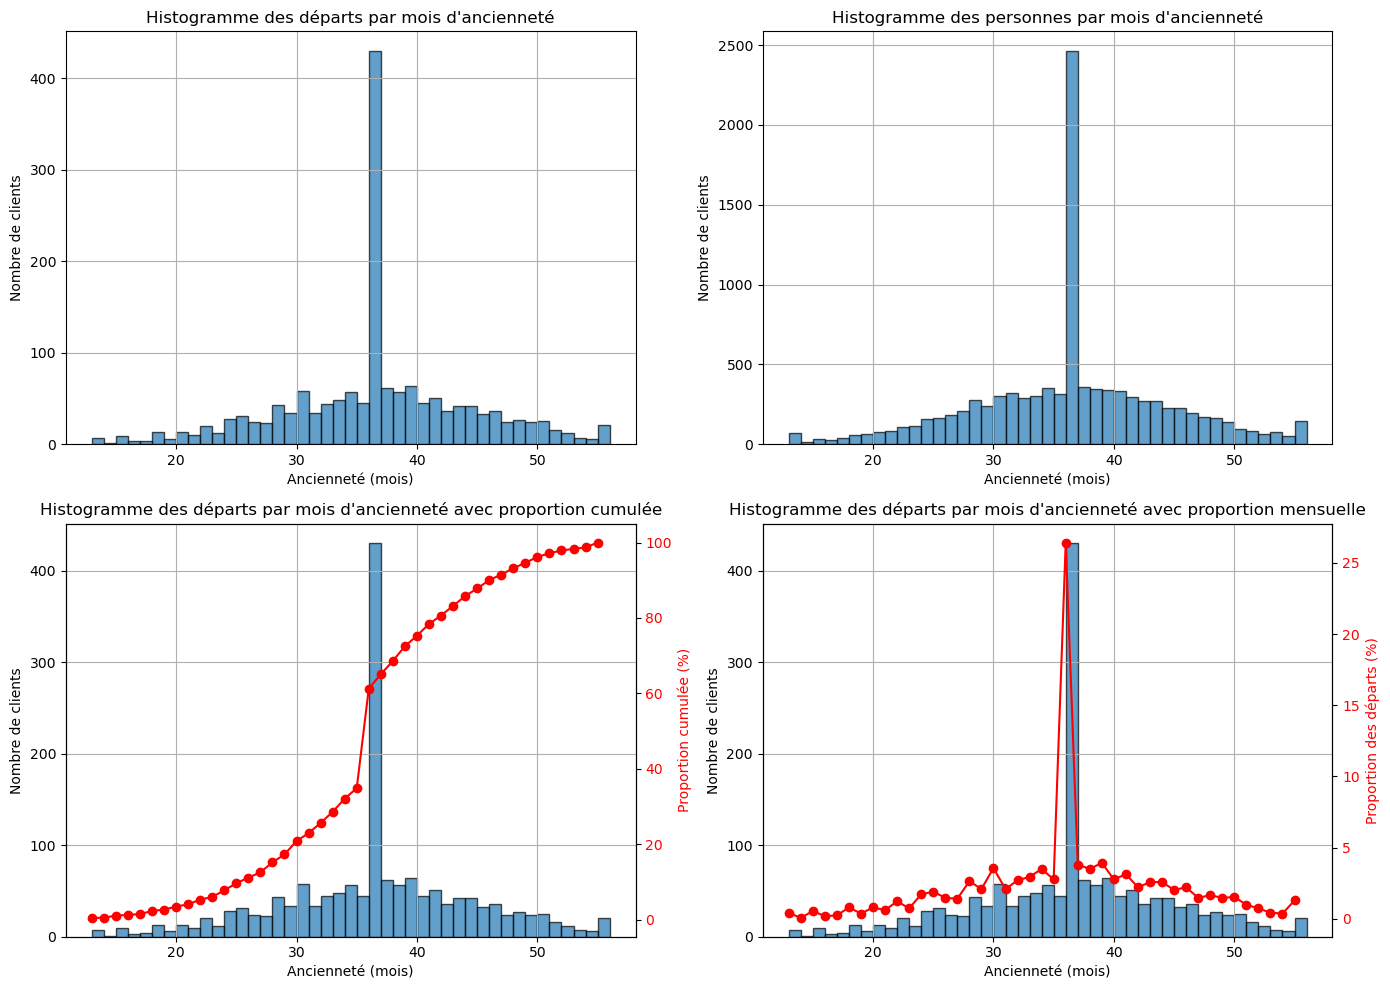

In [50]:
# Cr√©er la figure et les sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Graphique 1: Histogramme des d√©parts par mois d'anciennet√©
clients_desertes = df[df['Censure'] == 1]
axes[0, 0].hist(clients_desertes['Anciennete_Client'], bins=range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1), edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Histogramme des d√©parts par mois d'anciennet√©")
axes[0, 0].set_xlabel("Anciennet√© (mois)")
axes[0, 0].set_ylabel("Nombre de clients")
axes[0, 0].grid(True)

# Graphique 2: Histogramme des clients en fonction de l'anciennet√©
clients_desertes = df
axes[0, 1].hist(clients_desertes['Anciennete_Client'], bins=range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1), edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Histogramme des personnes par mois d'anciennet√©")
axes[0, 1].set_xlabel("Anciennet√© (mois)")
axes[0, 1].set_ylabel("Nombre de clients")
axes[0, 1].grid(True)

# Graphique 3: Histogramme avec proportion cumul√©e
clients_desertes = df[df['Censure'] == 1]
bins = range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1)
counts, edges, _ = axes[1, 0].hist(clients_desertes['Anciennete_Client'], bins=bins, edgecolor='black', alpha=0.7)
axes[1, 0].set_title("Histogramme des d√©parts par mois d'anciennet√© avec proportion cumul√©e")
axes[1, 0].set_xlabel("Anciennet√© (mois)")
axes[1, 0].set_ylabel("Nombre de clients")
axes[1, 0].grid(True)

# Proportion cumul√©e
ax2 = axes[1, 0].twinx()
cumulative_proportion = np.cumsum(counts) / np.sum(counts) * 100
ax2.plot(edges[:-1], cumulative_proportion, color='red', marker='o', linestyle='-', label='Proportion cumul√©e')
ax2.set_ylabel("Proportion cumul√©e (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Graphique 4: Histogramme avec proportion mensuelle
clients_desertes = df[df['Censure'] == 1]
bins = range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1)
counts, edges, _ = axes[1, 1].hist(clients_desertes['Anciennete_Client'], bins=bins, edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Histogramme des d√©parts par mois d'anciennet√© avec proportion mensuelle")
axes[1, 1].set_xlabel("Anciennet√© (mois)")
axes[1, 1].set_ylabel("Nombre de clients")
axes[1, 1].grid(True)

# Proportion par mois
ax2 = axes[1, 1].twinx()
total_clients_desertes = len(clients_desertes)
proportion_par_mois = (counts / total_clients_desertes) * 100
ax2.plot(edges[:-1], proportion_par_mois, color='red', marker='o', linestyle='-', label='Proportion mensuelle')
ax2.set_ylabel("Proportion des d√©parts (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()
plt.show()


- **√Ä 37 mois**, le nombre de clients est le plus √©lev√©, comme indiqu√© dans l‚Äôhistogramme d‚Äôanciennet√©. Cela signifie que beaucoup de clients atteignent cette anciennet√© avant de d√©cider de rester ou de partir.

### B) La fonction de risque cumul√©e H(t)

| **Estimateur de la fonction de risque cumul√©e \( H(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                                | $ \hat{H}(t) = -\log(\hat{S}(t)) $, avec $ \hat{S}(t) = \frac{n(t)}{n_0} $ | $ \hat{H}(t) = \sum_{t_i \leq t} \frac{d_i}{n_i} $ (Estimateur de Nelson-Aalen) |
| **Description**                                            | H(t)  repr√©sente le risque cumulatif des clients qui quittent la banque jusqu'au mois t | Somme des ratios des √©v√©nements observ√©s $ d_i $ et du nombre √† risque $ n_i $ √† chaque instant $ t_i $, prenant en compte la censure. |
| **Propri√©t√©s**                                             | - **Non biais√©**. <br> - **Consistant** pour grands √©chantillons. | - **Non biais√©** sous censure al√©atoire. <br> - **Consistant** et **asymptotiquement normal**. <br> - Tient compte des √©v√©nements censur√©s. |
| **Variance**                                               | Non applicable.                                      | Variance estim√©e par : <br> $ \text{Var}(\hat{H}(t)) = \sum_{t_i \leq t} \frac{d_i}{n_i^2} $ |


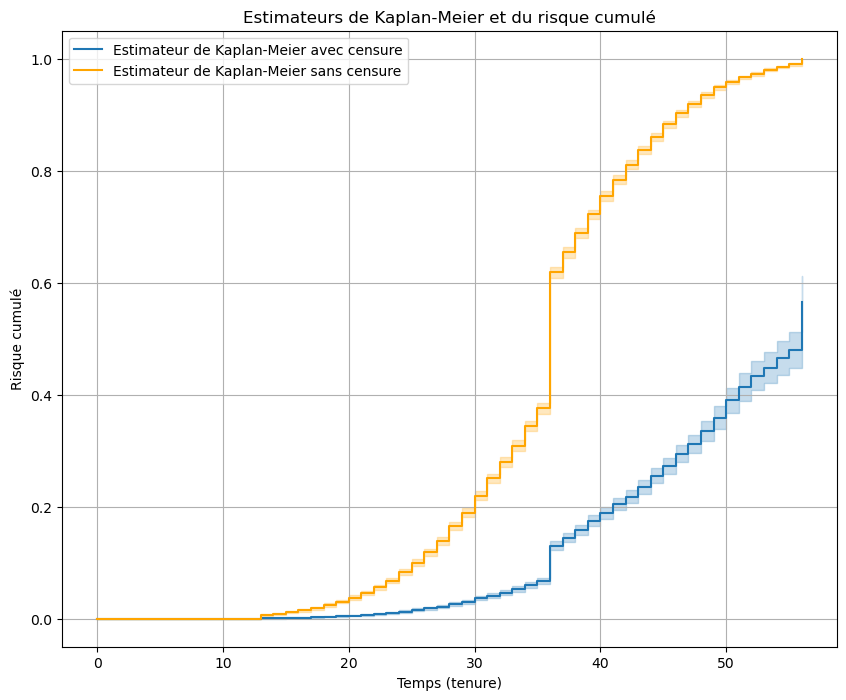

In [55]:
# √âtape 3: Tracer les estimateurs de risque cumul√©
plt.figure(figsize=(10, 8))

# Tracer l'estimateur de Kaplan-Meier
kmf_censure.plot_cumulative_density(ax=plt.gca(), label='Estimateur de Kaplan-Meier avec censure')
kmf_nCensure.plot_cumulative_density(ax=plt.gca(), label='Estimateur de Kaplan-Meier sans censure', color='orange')


# Ajouter des d√©tails au graphique
plt.title("Estimateurs de Kaplan-Meier et du risque cumul√©")
plt.xlabel("Temps (tenure)")
plt.ylabel("Risque cumul√©")
plt.legend()
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilit√©
plt.show()  # Afficher le graphique

- La p√©riode **35-40 mois** montre une forte divergence entre les deux courbes :
  
	‚Ä¢	Sans censure (orange) : Le risque cumul√© augmente de mani√®re tr√®s rapide, amplifiant l‚Äôeffet des d√©parts observ√©s.

	‚Ä¢	Avec censure (bleue) : Bien qu‚Äôil y ait une augmentation, elle est moins brutale, car les clients censur√©s (actifs) r√©duisent l‚Äôimpact des d√©parts massifs.
- √Ä **37 mois**, le nombre important de clients quittant la banque provoque une forte augmentation du risque cumul√© dans la courbe sans censure.
- La courbe avec censure montre √©galement une augmentation, mais elle est plus mod√©r√©e, car elle r√©partit le risque sur l‚Äôensemble de la population, y compris les clients encore fid√®les.
- P√©riode critique **(35-40 mois)** : La courbe sans censure surestime le risque d‚Äôenviron **20-30 %**.
- Au-del√† de **50 mois** : La diff√©rence diminue mais reste pr√©sente (environ **10-15 %**).

### C) la fonction taux de risque instantan√© h(t)

| **Estimateur de la fonction de taux de risque instantan√© \( h(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|------------------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                                            | $ \hat{h}(t) = \frac{d(t)}{n(t) \Delta t} $           | $ \hat{h}(t) = \frac{d_i}{n_i \Delta t} $                         |
| **Description**                                                        |La probabilit√© instantan√©e qu'un individu quitte la banque au cours du mois ùë°, sous la condition qu'il soit encore client actif au d√©but de ce m√™me mois. | Taux de risque instantan√© calcul√© en tenant compte des donn√©es censur√©es. |
| **Propri√©t√©s**                                                         | - **Non biais√©**. <br> - **Consistant** pour grands √©chantillons. | - **Non biais√©** sous censure al√©atoire. <br> - **Consistant** et **asymptotiquement normal**. |
| **Variance**                                                           | Non applicable.                                      | Variance estim√©e √† partir des donn√©es censur√©es. |


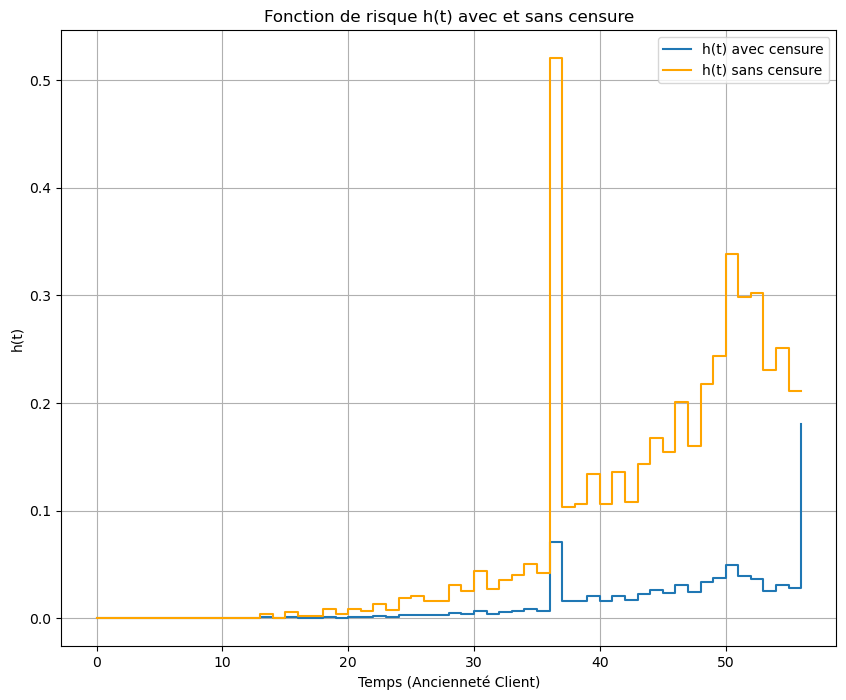

In [60]:
# Importer les biblioth√®ques n√©cessaire
# Calculer la fonction de risque h(t) avec censure
# h(t) est obtenu par la relation h(t) = -d/dt(log(S(t)))
# Ici, on prend le logarithme de la fonction de survie et on calcule la diff√©rence
hazard_est = (-np.log(kmf_censure.survival_function_)).diff().fillna(0)  # Estimation de la fonction de risque

# √âtape 1: Filtrer les donn√©es pour n'inclure que les √©v√©nements observ√©s
observed_data = df[df['Censure'] == 1]

# √âtape 2: Estimer la fonction de survie avec Kaplan-Meier sur les donn√©es observ√©es
kmf_observed = KaplanMeierFitter()
kmf_observed.fit(durations=observed_data['Anciennete_Client'])

# √âtape 3: Calculer la fonction de risque h(t) sans censure
hazard_est_no_censor = (-np.log(kmf_observed.survival_function_)).diff().fillna(0)  # Estimation de la fonction de risque

# Cr√©er un graphique pour tracer les deux fonctions de risque
plt.figure(figsize=(10, 8))

# Tracer la fonction de risque avec censure
plt.step(kmf_observed.timeline, hazard_est.values, where="post", label='h(t) avec censure')

# Tracer la fonction de risque sans censure
plt.step(kmf_observed.timeline, hazard_est_no_censor.values, where="post", label='h(t) sans censure', color='orange')

# Ajouter des d√©tails au graphique
plt.title("Fonction de risque h(t) avec et sans censure")  # Titre du graphique
plt.xlabel("Temps (Anciennet√© Client)")  # √âtiquette de l'axe X
plt.ylabel("h(t)")  # √âtiquette de l'axe Y
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilit√©
plt.legend()  # Ajouter une l√©gende pour diff√©rencier les courbes
plt.show()  # Afficher le graphique


- Pour les deux courbes, le risque instantan√© reste faible dans les premiers mois **(0 √† 30 mois)**, avec une augmentation progressive entre **30 et 35 mois**.
- La courbe sans censure (orange) montre un pic majeur de risque instantan√© √† **37 mois**, correspondant √† un grand nombre de clients quittant la banque √† ce moment pr√©cis.
- La courbe avec censure (bleu) montre √©galement une augmentation notable √† **37 mois**, mais de mani√®re plus mod√©r√©e.la courbe sans censure surestime le risque instantan√© de **200-250 %**, ce qui refl√®te l‚Äôimpact des d√©parts massifs √† ce moment.
- **Apr√®s 40 mois**, la courbe sans censure reste relativement √©lev√©e, tandis que la courbe avec censure diminue, refl√©tant une stabilisation du risque pour les clients restants.
- Apr√®s **50 mois**, la diff√©rence diminue, mais reste significative (environ **50-70 %**).

## 3) Estimateur de Nelson-Aalen 

### A) La fonction de risque cumul√©e H(t)

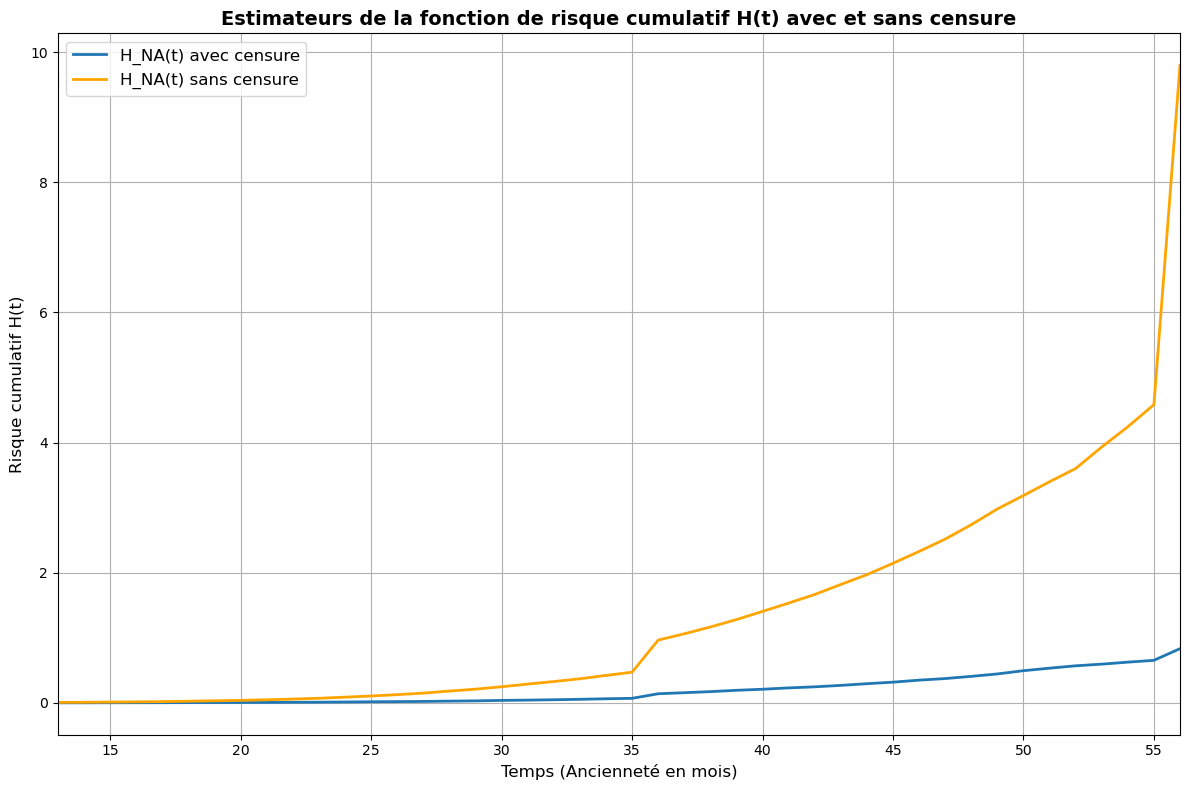

In [65]:
# Cr√©er des objets NelsonAalenFitter pour les deux cas
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster les donn√©es au NelsonAalenFitter pour les cas avec et sans censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None)  # Sans censure

# Obtenir l'estimateur de H(t) pour les deux cas
risque_instantane_censure = naf_censure.cumulative_hazard_
risque_instantane_nCensure = naf_nCensure.cumulative_hazard_

# Obtenir les intervalles de confiance pour les donn√©es avec censure
confidence_interval_censure = naf_censure.confidence_interval_

# Tracer l'estimateur H(t) et l'intervalle de confiance
plt.figure(figsize=(12, 8))

# Tracer H(t) pour les donn√©es avec censure
plt.plot(risque_instantane_censure, label="H_NA(t) avec censure", linewidth=2)

# Tracer l'intervalle de confiance pour les donn√©es avec censure

# Tracer H(t) pour les donn√©es sans censure
plt.plot(risque_instantane_nCensure, label="H_NA(t) sans censure", color="orange", linewidth=2)

# Ajouter une l√©gende, un titre et des labels aux axes
plt.legend(loc="upper left", fontsize=12)
plt.xlim(df['Anciennete_Client'].min(), df['Anciennete_Client'].max())
plt.title("Estimateurs de la fonction de risque cumulatif H(t) avec et sans censure", fontsize=14, fontweight='bold')
plt.xlabel("Temps (Anciennet√© en mois)", fontsize=12)
plt.ylabel("Risque cumulatif H(t)", fontsize=12)

# Afficher la grille pour am√©liorer la lisibilit√©
plt.grid(True)

# Afficher le graphique avec ajustement des marges
plt.tight_layout()
plt.show()


- La divergence entre les deux courbes apr√®s 35 mois montre que les clients censur√©s (encore actifs) jouent un r√¥le important dans l‚Äôestimation du risque cumul√©.
- La forte augmentation du risque cumul√© dans la courbe sans censure refl√®te l‚Äôimpact des d√©parts massifs observ√©s √† 37 mois, d√©j√† identifi√©s comme un moment cl√© du churn et **l‚Äôaugmentation est plus progressive et liss√©e de la courbe avec censure**, car elle prend en compte les clients censur√©s (encore actifs)..
- Entre **35 et 40 mois** : Surestimation de **50-60 %** du risque par la courbe sans censure.
- Apr√®s **50 mois** : Diff√©rence r√©duite √† **30-40 %**, mais toujours notable.

### B)  la fonction taux de risque instantan√© h(t)

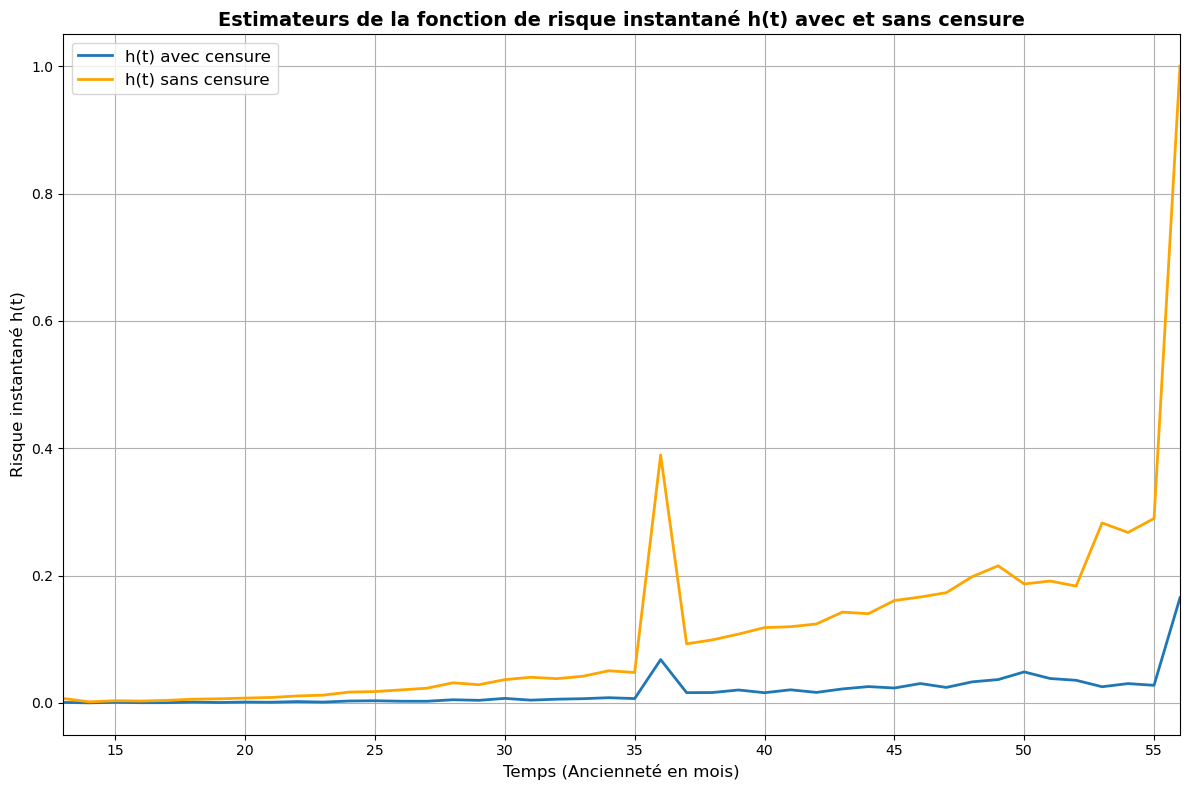

In [69]:


# Cr√©er des objets NelsonAalenFitter pour les deux cas
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster les donn√©es au NelsonAalenFitter pour les cas avec et sans censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None)  # Sans censure

# Obtenir l'estimateur de H(t) pour les deux cas
risque_instantane_censure = naf_censure.cumulative_hazard_
risque_instantane_nCensure = naf_nCensure.cumulative_hazard_

# Calculer h(t) pour les donn√©es avec censure
h_t_censure = naf_censure.event_table['observed'] / naf_censure.event_table['at_risk']

# Calculer h(t) pour les donn√©es sans censure
h_t_nCensure = naf_nCensure.event_table['observed'] / naf_nCensure.event_table['at_risk']

# Tracer l'estimateur h(t)
plt.figure(figsize=(12, 8))

# Tracer h(t) pour les donn√©es avec censure
plt.plot(h_t_censure.index, h_t_censure, label="h(t) avec censure", linewidth=2)

# Tracer h(t) pour les donn√©es sans censure
plt.plot(h_t_nCensure.index, h_t_nCensure, label="h(t) sans censure", color="orange", linewidth=2)

# Ajouter une l√©gende, un titre et des labels aux axes
plt.legend(loc="upper left", fontsize=12)
plt.xlim(df['Anciennete_Client'].min(), df['Anciennete_Client'].max())
plt.title("Estimateurs de la fonction de risque instantan√© h(t) avec et sans censure", fontsize=14, fontweight='bold')
plt.xlabel("Temps (Anciennet√© en mois)", fontsize=12)
plt.ylabel("Risque instantan√© h(t)", fontsize=12)

# Afficher la grille pour am√©liorer la lisibilit√©
plt.grid(True)

# Afficher le graphique avec ajustement des marges
plt.tight_layout()
plt.show()


- Le pic marqu√© √† 37 mois refl√®te un ph√©nom√®ne structurel o√π de nombreux clients d√©cident de quitter la banque.
- La courbe sans censure met en √©vidence les p√©riodes critiques avec des d√©parts massifs, mais elle exag√®re les variations, car elle ignore les clients encore actifs.
- La courbe avec censure donne une image plus r√©aliste du risque instantan√© sur l‚Äôensemble de la population.
- Le risque pour les clients restants **(apr√®s 40 mois)**  est mod√©r√© avec la censure, mais il augmente sensiblement sans censure, refl√©tant un ph√©nom√®ne de s√©lection o√π les clients les moins engag√©s partent progressivement.
- Avant **30 mois** : Diff√©rence n√©gligeable (**<5 %**).
- Autour de **37 mois** : La courbe sans censure surestime le risque d‚Äôenviron **300-400 %**, refl√©tant les d√©parts massifs concentr√©s √† ce moment.
- Apr√®s **50 mois** : L‚Äô√©cart diminue l√©g√®rement, mais reste significatif **(50-70 %)**.

### C) La fonction de survie S(t) 

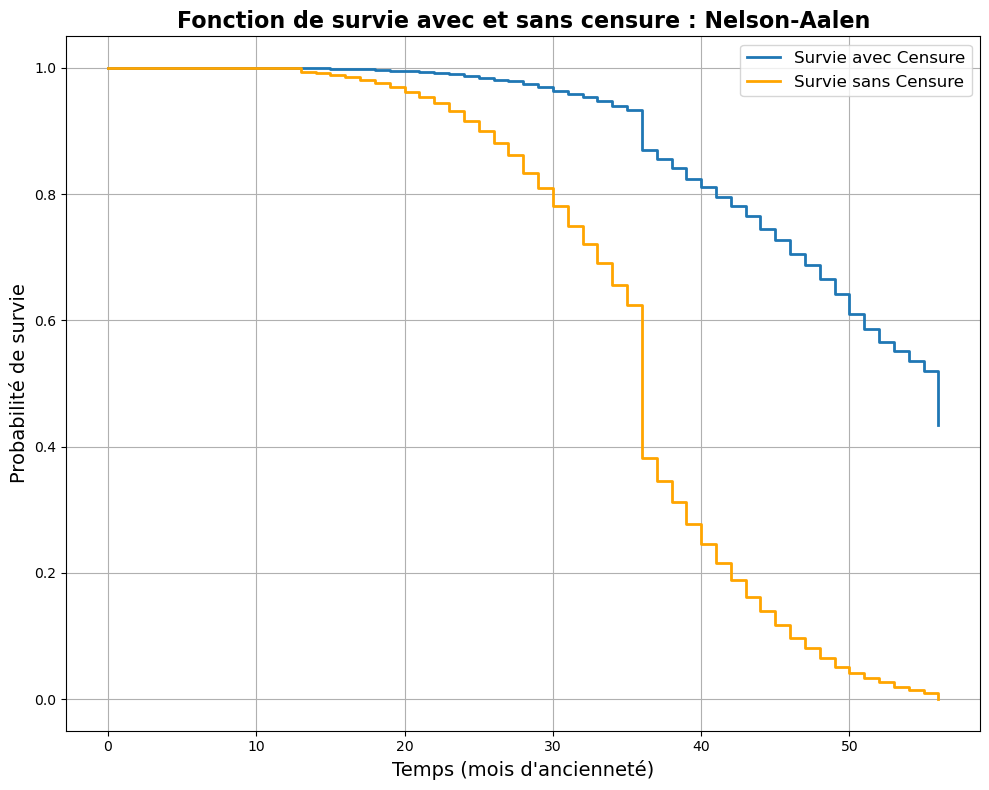

In [73]:
# Instancier le Nelson-Aalen Fitter pour les deux cas (avec et sans censure)
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster le mod√®le Nelson-Aalen pour les donn√©es avec censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'], label='Risque cumulatif avec Censure')

# Ajuster le mod√®le Nelson-Aalen pour les donn√©es sans censure (en consid√©rant que tous les √©v√©nements sont observ√©s)
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None, label='Risque cumulatif sans Censure')

# Calculer la fonction de survie √† partir du risque cumulatif
# S(t) = exp(-H(t))

# Fonction de survie avec censure
S_t_censure = np.exp(-naf_censure.cumulative_hazard_)

# Fonction de survie sans censure
S_t_nCensure = np.exp(-naf_nCensure.cumulative_hazard_)

# Cr√©er la figure et l'axe pour la courbe de survie
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Tracer la fonction de survie avec censure
ax.step(S_t_censure.index, S_t_censure['Risque cumulatif avec Censure'], where='post', label='Survie avec Censure', linewidth=2)

# Tracer la fonction de survie sans censure
ax.step(S_t_nCensure.index, S_t_nCensure['Risque cumulatif sans Censure'], where='post', label='Survie sans Censure', linewidth=2, color='orange')

# Titre et labels pour l'axe de la survie
plt.title("Fonction de survie avec et sans censure : Nelson-Aalen", fontsize=16, fontweight='bold')
plt.xlabel("Temps (mois d'anciennet√©)", fontsize=14)
plt.ylabel("Probabilit√© de survie", fontsize=14)

# Ajouter une grille pour am√©liorer la lisibilit√©
plt.grid(True)

# Ajouter une l√©gende pour diff√©rencier les deux courbes
plt.legend(loc='best', fontsize=12)

# Afficher la courbe
plt.tight_layout()
plt.show()


## 4) Comparaison des diff√©rents mod√®les

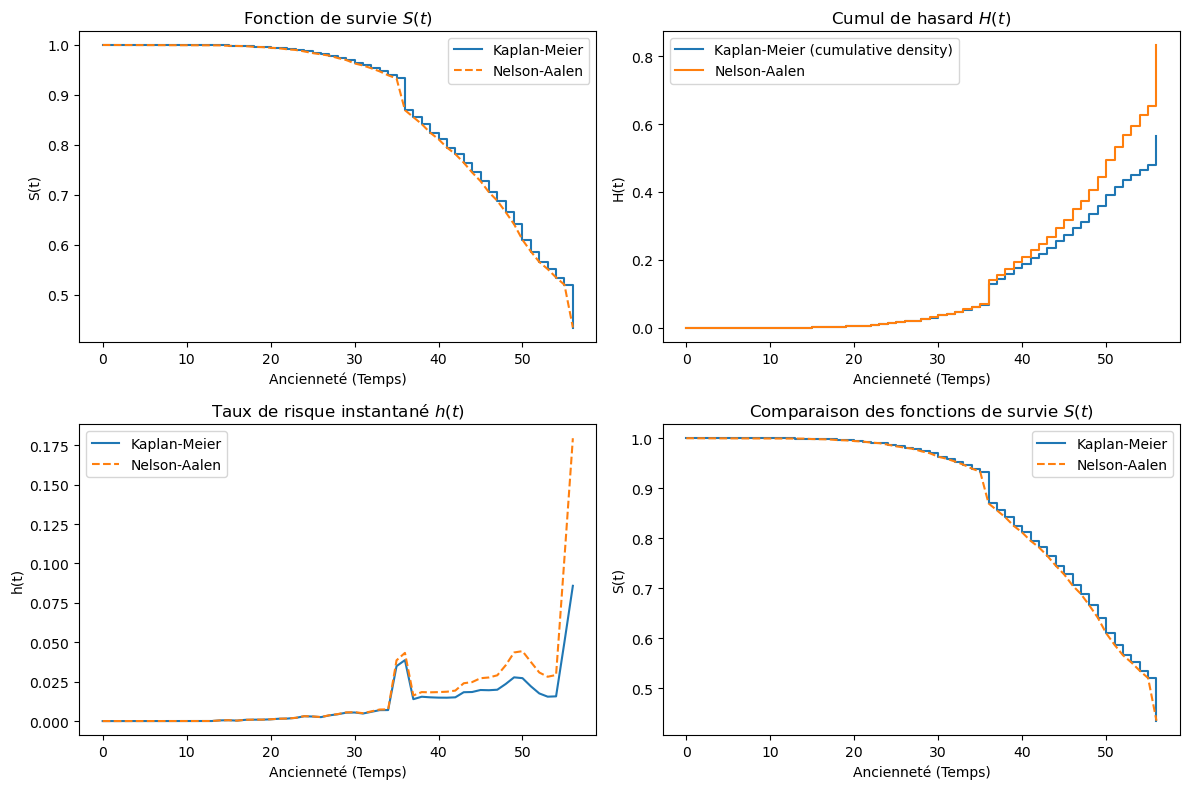

In [76]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter

# Adapter les colonnes pour les variables 'Anciennete_Client' et 'Censure'
T = df['Anciennete_Client']  # Temps de survie (anciennet√©)
C = df['Censure']            # Variable de censure (1 = √©v√©nement observ√©, 0 = censur√©)

# Estimation par Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=C)

# Estimation par Nelson-Aalen
naf = NelsonAalenFitter()
naf.fit(T, event_observed=C)

# Afficher les courbes de survie
plt.figure(figsize=(12, 8))

# Fonction de survie Kaplan-Meier et Nelson-Aalen
plt.subplot(2, 2, 1)
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, np.exp(-naf.cumulative_hazard_), label='Nelson-Aalen', linestyle="--")
plt.title("Fonction de survie $S(t)$")
plt.xlabel("Anciennet√© (Temps)")
plt.ylabel("S(t)")
plt.legend()

# Fonction de cumul du risque H(t)
plt.subplot(2, 2, 2)
kmf.plot_cumulative_density(ci_show=False, label='Kaplan-Meier (cumulative density)')
naf.plot_cumulative_hazard(ci_show=False, label='Nelson-Aalen')
plt.title("Cumul de hasard $H(t)$")
plt.xlabel("Anciennet√© (Temps)")
plt.ylabel("H(t)")
plt.legend()

# Taux de risque instantan√© h(t)
plt.subplot(2, 2, 3)
hazard_km = -np.gradient(kmf.survival_function_.values.flatten(), kmf.survival_function_.index)
hazard_na = np.gradient(naf.cumulative_hazard_.values.flatten(), naf.cumulative_hazard_.index)

plt.plot(kmf.survival_function_.index, hazard_km, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, hazard_na, label='Nelson-Aalen', linestyle="--")
plt.title("Taux de risque instantan√© $h(t)$")
plt.xlabel("Anciennet√© (Temps)")
plt.ylabel("h(t)")
plt.legend()

# Superposition des deux estimateurs de survie pour comparaison
plt.subplot(2, 2, 4)
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, np.exp(-naf.cumulative_hazard_), label='Nelson-Aalen', linestyle="--")
plt.title("Comparaison des fonctions de survie $S(t)$")
plt.xlabel("Anciennet√© (Temps)")
plt.ylabel("S(t)")
plt.legend()

plt.tight_layout()
plt.show()


**Fonction de survie (S(t))** :

- Les deux mod√®les sont coh√©rents pour estimer la fonction de survie, mais Kaplan-Meier est g√©n√©ralement plus pr√©cis pour estimer  S(t) , car il est sp√©cifiquement con√ßu pour cela.
- La m√©thode Nelson-Aalen tend √† l√©g√®rement **sous-estimer la probabilit√© de survie** √† mesure que le temps avance.

**Risque cumil√© (H(t))** :

- Diff√©rence notable : Nelson-Aalen affiche un risque cumul√© l√©g√®rement plus √©lev√©, en particulier apr√®s 35 mois, et continue √† cro√Ætre rapidement.
- Cette diff√©rence refl√®te que Nelson-Aalen int√®gre les risques de mani√®re plus continue, tandis que Kaplan-Meier segmente davantage les p√©riodes de temps.

**Taux de risque instantan√© (h(t))** :

- Les courbes des deux mod√®les suivent des tendances similaires, avec des pics autour de 37 mois et une augmentation progressive apr√®s 50 mois.
- Kaplan-Meier (bleu) montre des variations plus abruptes, tandis que Nelson-Aalen (orange pointill√©) produit une courbe plus lisse.


Les mod√®les Kaplan-Meier et Nelson-Aalen sont coh√©rents et compl√©mentaires. Kaplan-Meier excelle pour estimer la survie  S(t) , tandis que Nelson-Aalen est plus adapt√© pour le risque cumul√©  H(t)  et le risque instantan√©  h(t) .

# V) Mod√©lisation parametrique sans covariable et avec ou sans censure

| **Loi**            | **Densit√© de probabilit√©**               | **Fonction de survie**                                             | **Description**                                                                                                                                      |
|--------------------|-------------------------------------------------------------|--------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------
| **Exponentielle**   | $ f(t) = \lambda e^{-\lambda t} $ | $ S(t) = e^{-\lambda t} $                                          | C'est une loi de survie caract√©ris√©e par un taux de risque constant. Utilis√©e principalement pour mod√©liser le temps entre des √©v√©nements ind√©pendants et exponentiels.  
| **Weibull**        | $ f(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-\left(\frac{t}{\lambda}\right)^k} $ | $ S(t) = e^{-(t/\lambda)^k} $                                      | Mod√®le flexible pour des temps de survie, utile pour mod√©liser des taux de risque qui augmentent ou diminuent avec le temps. Les param√®tres $ k $ et $ \lambda $ modifient la forme. |
| **Log-normale**    | $ f(t) = \frac{1}{t \sigma \sqrt{2\pi}} e^{-\frac{(\ln t - \mu)^2}{2\sigma^2}} $ | $ S(t) = 1 - \Phi\left(\frac{\ln t - \mu}{\sigma}\right) $         | Mod√®le souvent utilis√© pour des donn√©es asym√©triques positives, comme des revenus ou des tailles. La distribution est d√©finie par les param√®tres $ \mu $ et $ \sigma $.     |


## 1) Les mod√®les 

## A) Le mod√®le Exponentiel

## a) Avec censure 

In [84]:
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter
import matplotlib.pyplot as plt

# Ajustement des mod√®les avec censure

# Exponentiel
exp_fitter = ExponentialFitter()
exp_fitter.fit(T, event_observed=C)
print("R√©sum√© Exponentiel avec censure")
print(exp_fitter.summary)
# Calcul AIC et BIC avec censure
n = len(T)

# Exponentiel
AIC_exp_cens = exp_fitter.AIC_
BIC_exp_cens = len(exp_fitter.summary) * np.log(n) - 2 * exp_fitter.log_likelihood_
print(f"AIC Exponentiel avec censure: {AIC_exp_cens}, BIC Exponentiel avec censure: {BIC_exp_cens}")

R√©sum√© Exponentiel avec censure
               coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  223.630567   5.54418      212.764174      234.496959     0.0   

                 z    p  -log2(p)  
lambda_  40.336096  0.0       inf  
AIC Exponentiel avec censure: 20860.125751925778, BIC Exponentiel avec censure: 20867.34871232911


## b) Sans censure

In [87]:
# Filtre les donn√©es sans censure (C = 1)
T_no_cens = T[C == 1] 
C_no_cens = C[C == 1]  

# Ajustement des mod√®les sans censure

# Exponentiel
exp_fitter_no_cens = ExponentialFitter()
exp_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("R√©sum√© Exponentiel sans censure")
print(exp_fitter_no_cens.summary)

# Calcul AIC et BIC sans censure
n_no_cens = len(T_no_cens)

# Exponentiel
AIC_exp_no_cens = exp_fitter_no_cens.AIC_
BIC_exp_no_cens = len(exp_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * exp_fitter_no_cens.log_likelihood_
print(f"AIC Exponentiel sans censure: {AIC_exp_no_cens}, BIC Exponentiel sans censure: {BIC_exp_no_cens}")

R√©sum√© Exponentiel sans censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  36.178223  0.896919       34.420294       37.936152     0.0   

                z    p  -log2(p)  
lambda_  40.33611  0.0       inf  
AIC Exponentiel sans censure: 14932.841983575865, BIC Exponentiel sans censure: 14938.236476683083


## B) Le mod√®le Log-Normal

## a)  Avec censure

In [91]:

# Log-Normal
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(T, event_observed=C)
print("R√©sum√© Log-Normal avec censure")
print(lognormal_fitter.summary)

# Log-Normal (approximation)
AIC_lognormal_cens = lognormal_fitter.AIC_
BIC_lognormal_cens = len(lognormal_fitter.summary) * np.log(n) - 2 * lognormal_fitter.log_likelihood_
print(f"AIC Log-Normal avec censure: {AIC_lognormal_cens}, BIC Log-Normal avec censure: {BIC_lognormal_cens}")


R√©sum√© Log-Normal avec censure
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
mu_     4.012221  0.008771        3.995030        4.029412     0.0   
sigma_  0.351208  0.006326        0.338809        0.363606     1.0   

                 z    p  -log2(p)  
mu_     457.441969  0.0       inf  
sigma_ -102.561333  0.0       inf  
AIC Log-Normal avec censure: 17275.43934757915, BIC Log-Normal avec censure: 17289.885268385817


## b) Sans censure

In [94]:
# Log-Normal sans censure
lognormal_fitter_no_cens = LogNormalFitter()
lognormal_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("R√©sum√© Log-Normal sans censure")
print(lognormal_fitter_no_cens.summary)

# Log-Normal (approximation sans censure)
AIC_lognormal_no_cens = lognormal_fitter_no_cens.AIC_
BIC_lognormal_no_cens = len(lognormal_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * lognormal_fitter_no_cens.log_likelihood_
print(f"AIC Log-Normal sans censure: {AIC_lognormal_no_cens}, BIC Log-Normal sans censure: {BIC_lognormal_no_cens}")


R√©sum√© Log-Normal sans censure
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
mu_     3.562463  0.005879        3.550941        3.573986     0.0   
sigma_  0.237129  0.004157        0.228981        0.245276     1.0   

                 z    p  -log2(p)  
mu_     605.982443  0.0       inf  
sigma_ -183.516809  0.0       inf  
AIC Log-Normal sans censure: 11530.476286810219, BIC Log-Normal sans censure: 11541.265273024657


## C) Le mod√®le Weibull

## a) Avec censure

In [98]:
# Weibull
weibull_fitter = WeibullFitter()
weibull_fitter.fit(T, event_observed=C)
print("R√©sum√© Weibull avec censure")
print(weibull_fitter.summary)

# Weibull
AIC_weibull_cens = weibull_fitter.AIC_
BIC_weibull_cens = len(weibull_fitter.summary) * np.log(n) - 2 * weibull_fitter.log_likelihood_
print(f"AIC Weibull avec censure: {AIC_weibull_cens}, BIC Weibull avec censure: {BIC_weibull_cens}")


R√©sum√© Weibull avec censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  56.047764  0.389121        55.28510       56.810428     1.0   
rho_      5.096390  0.094364         4.91144        5.281341     1.0   

                  z    p  -log2(p)  
lambda_  141.466820  0.0       inf  
rho_      43.410526  0.0       inf  
AIC Weibull avec censure: 17241.53487136317, BIC Weibull avec censure: 17255.980792169834


## b) Sans censure

In [101]:
# Weibull
weibull_fitter_no_cens = WeibullFitter()
weibull_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("R√©sum√© Weibull sans censure")
print(weibull_fitter_no_cens.summary)

# Weibull
AIC_weibull_no_cens = weibull_fitter_no_cens.AIC_
BIC_weibull_no_cens = len(weibull_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * weibull_fitter_no_cens.log_likelihood_
print(f"AIC Weibull sans censure: {AIC_weibull_no_cens}, BIC Weibull sans censure: {BIC_weibull_no_cens}")

R√©sum√© Weibull sans censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  39.260700  0.200286       38.868146       39.653254     1.0   
rho_      5.127452  0.095586        4.940107        5.314797     1.0   

                  z    p  -log2(p)  
lambda_  191.029922  0.0       inf  
rho_      43.180447  0.0       inf  
AIC Weibull sans censure: 11329.205390020263, BIC Weibull sans censure: 11339.994376234701


## 2) Test de conformit√© de Kolmogorov-Smirnov et de Cram√©r-von Mises.

### 2.1) Test de Kolmogorov-Smirnov (KS)

####  Explication g√©n√©rale
- **Statistique de test D** : La statistique **D** mesure la plus grande diff√©rence entre la fonction de r√©partition empirique des donn√©es (observ√©e) et la fonction de r√©partition th√©orique du mod√®le test√©.
  - **Plus D est grande**, plus il y a de preuves contre l‚Äôajustement des donn√©es au mod√®le test√©.
  - Si la p-value associ√©e √† D est **inf√©rieure √† un seuil de signification** (souvent 0.05), on rejette l'hypoth√®se nulle selon laquelle les donn√©es suivent ce mod√®le.

#### Hypoth√®ses du test de KS
- **H‚ÇÄ (hypoth√®se nulle)** : Les donn√©es suivent la distribution du mod√®le test√©.
- **H‚ÇÅ (hypoth√®se alternative)** : Les donn√©es ne suivent pas la distribution du mod√®le test√©.

#### Interpr√©tation des r√©sultats
- **Zone d'acceptation** : Si p-value ‚â• 0.05, on **accepte H‚ÇÄ** (les donn√©es suivent le mod√®le).
- **Zone de rejet** : Si p-value < 0.05, on **rejette H‚ÇÄ** (les donn√©es ne suivent pas le mod√®le).



### 2.2) Test de Cram√©r-von Mises (CvM)

#### Explication g√©n√©rale
- **Statistique de test W¬≤** : La statistique **W¬≤** mesure l'√©cart quadratique entre la fonction de r√©partition empirique et celle du mod√®le th√©orique.
  - **Plus W¬≤ est grande**, plus il y a de preuves contre l'ajustement des donn√©es au mod√®le.
  - Si la p-value associ√©e √† W¬≤ est **inf√©rieure √† un seuil de signification**, cela indique que le mod√®le ne s‚Äôajuste pas bien aux donn√©es.

#### Hypoth√®ses du test de CvM
- **H‚ÇÄ (hypoth√®se nulle)** : Les donn√©es suivent la distribution du mod√®le test√©.
- **H‚ÇÅ (hypoth√®se alternative)** : Les donn√©es ne suivent pas la distribution du mod√®le test√©.

#### Interpr√©tation des r√©sultats
- **Zone d'acceptation** : Si p-value ‚â• 0.05, on **accepte H‚ÇÄ** (les donn√©es suivent le mod√®le).
- **Zone de rejet** : Si p-value < 0.05, on **rejette H‚ÇÄ** (les donn√©es ne suivent pas le mod√®le).



### 2.3) Synth√®se des r√©sultats

**Test KS (Kolmogorov-Smirnov)**
- La statistique **D** permet d'√©valuer la diff√©rence entre la fonction de r√©partition empirique et celle du mod√®le test√©. Une statistique D √©lev√©e et une p-value faible indiquent un mauvais ajustement du mod√®le aux donn√©es.

**Test CvM (Cram√©r-von Mises)**
- La statistique **W¬≤** mesure l'√©cart quadratique entre les fonctions de r√©partition empirique et th√©orique. Une statistique W¬≤ √©lev√©e et une p-value faible sugg√®rent que le mod√®le ne s'ajuste pas bien aux donn√©es.


In [146]:
import numpy as np
import pandas as pd
from scipy.stats import expon, weibull_min, lognorm, ks_2samp
from scipy.stats import cramervonmises_2samp  # Import pour le test CVM
n = len(T)
events = T[C == 1]  # S√©lectionner uniquement les √©v√©nements observ√©s

# Mod√®le exponentiel
params_exp = expon.fit(events, floc=0)  # For√ßons loc=0 pour un mod√®le de survie

# Mod√®le Weibull
params_weibull = weibull_min.fit(events, floc=0)  # For√ßons loc=0


# Mod√®le Log-Normal
params_lognorm = lognorm.fit(events, floc=0)  # For√ßons loc=0


# Simulation de donn√©es selon chaque mod√®le ajust√©
simulated_exp = expon.rvs(*params_exp, size=n)
simulated_weibull = weibull_min.rvs(*params_weibull, size=n)
simulated_lognorm = lognorm.rvs(*params_lognorm, size=n)

# Effectuer le test KS pour chaque mod√®le
ks_exp = ks_2samp(events, simulated_exp)
ks_weibull = ks_2samp(events, simulated_weibull)
ks_lognorm = ks_2samp(events, simulated_lognorm)

# Affichage des r√©sultats du test KS
print("\nTest de Kolmogorov-Smirnov pour chaque mod√®le:")
print(f"Exponential: statistic = {ks_exp.statistic}, p-value = {ks_exp.pvalue}")
print(f"Weibull: statistic = {ks_weibull.statistic}, p-value = {ks_weibull.pvalue}")
print(f"Log-Normal: statistic = {ks_lognorm.statistic}, p-value = {ks_lognorm.pvalue}")

# Test Cram√©r-von Mises pour chaque mod√®le
# Effectuer le test CVM pour chaque mod√®le
cvm_exp = cramervonmises_2samp(events, simulated_exp)
cvm_weibull = cramervonmises_2samp(events, simulated_weibull)
cvm_lognorm = cramervonmises_2samp(events, simulated_lognorm)

# Affichage des r√©sultats du test CVM
print("\nTest de Cram√©r-von Mises pour chaque mod√®le:")
print(f"Exponential: statistic = {cvm_exp.statistic}, p-value = {cvm_exp.pvalue}")
print(f"Weibull: statistic = {cvm_weibull.statistic}, p-value = {cvm_weibull.pvalue}")
print(f"Log-Normal: statistic = {cvm_lognorm.statistic}, p-value = {cvm_lognorm.pvalue}")



Test de Kolmogorov-Smirnov pour chaque mod√®le:
Exponential: statistic = 0.06256830601092896, p-value = 0.3604492705877376
Weibull: statistic = 0.046863387978142074, p-value = 0.718556365650543
Log-Normal: statistic = 0.09278688524590165, p-value = 0.048487360843070565

Test de Cram√©r-von Mises pour chaque mod√®le:
Exponential: statistic = 0.15943859715545727, p-value = 0.3626051068081151
Weibull: statistic = 0.06137001981349499, p-value = 0.8069758045815506
Log-Normal: statistic = 0.38309147010943434, p-value = 0.08013593824802301


### Tableau avec les differents indicateurs

| Model       |        AIC |        BIC |         KS Statistic | KS p-value |    CVM Statistic | CVM p-value |
|:------------|-----------:|-----------:|---------------------:|------------:|-----------------:|-------------:|
| Exponential | 14934.841984 | 14949.287904 | 0.41947415335988936 | 4.538482015405698e-224 | 84.94939176741025 | 2.5285893046067542e-08 |
| <span style="color: green;">Weibull</span>     | <span style="color: green;">11331.205390</span> | <span style="color: green;">11352.874271</span> | <span style="color: green;">0.1429511461355354</span> | <span style="color: green;">1.8370251545088531e-25</span> | <span style="color: green;">5.233544820713178</span> | <span style="color: green;">1.1788958698133456e-10</span> |
| Log-Normal  | 11532.476287 | 11554.145168 | 0.1862150322132033 | 4.950451593687497e-43 | 7.047564866314929 | 2.2310275848980154e-10 |

Les r√©sultats montrent que le mod√®le Weibull est le meilleur selon les crit√®res AIC et BIC. Tous les mod√®les (Exponential, Weibull, Log-Normal) ont des p-values extr√™mement faibles dans les tests de Kolmogorov-Smirnov et Cram√©r-von Mises, indiquant que les donn√©es observ√©es ne suivent pas parfaitement les distributions ajust√©es. Toutefois, le mod√®le Weibull pr√©sente les meilleures statistiques parmi les trois. Les tests sugg√®rent que, bien que le mod√®le Weibull soit optimal selon les crit√®res AIC et BIC, il y a une certaine inad√©quation avec les donn√©es.

### 2.4) QQPLOT

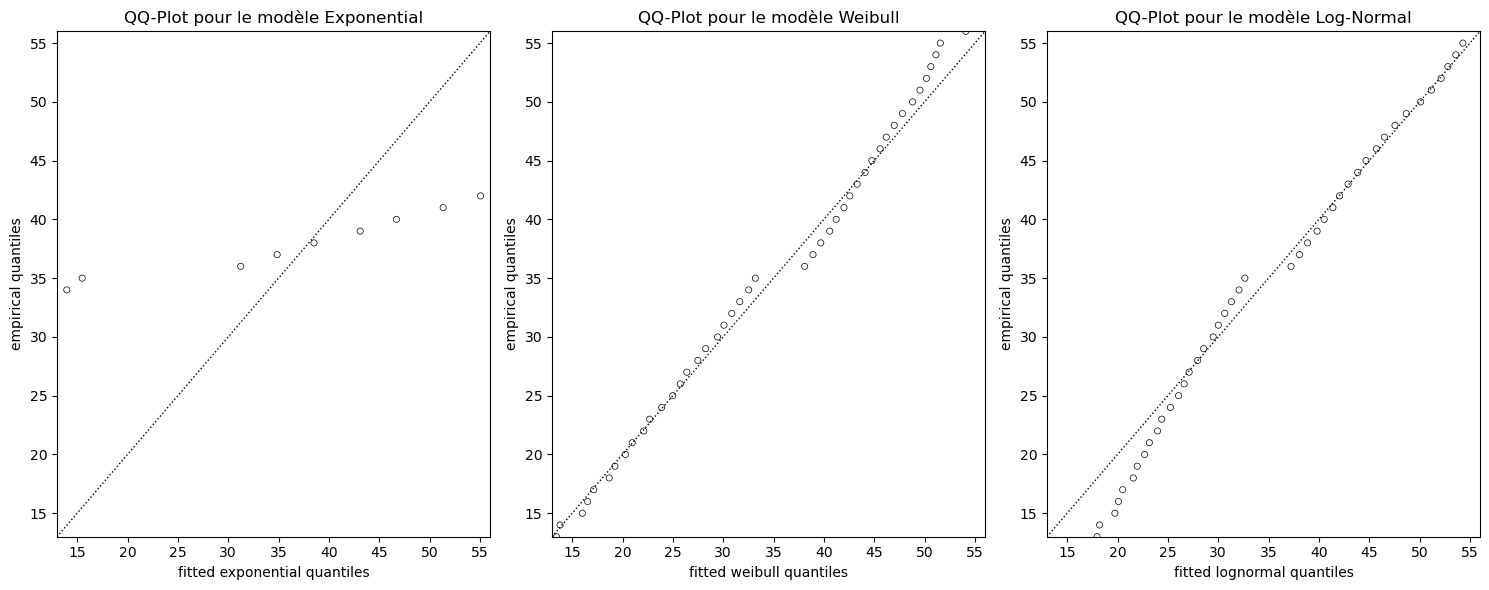

In [276]:
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter
from lifelines.plotting import qq_plot
import matplotlib.pyplot as plt

# Ajustement des mod√®les
exp_fitter = ExponentialFitter().fit(T, event_observed=C)
weibull_fitter = WeibullFitter().fit(T, event_observed=C)
lognormal_fitter = LogNormalFitter().fit(T, event_observed=C)

# Liste des mod√®les et leurs noms
models = [exp_fitter, weibull_fitter, lognormal_fitter]
model_names = ["Exponential", "Weibull", "Log-Normal"]

# Trac√© des QQ-Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, model in enumerate(models):
    qq_plot(model, ax=axes[i])
    axes[i].set_title(f"QQ-Plot pour le mod√®le {model_names[i]}")

plt.tight_layout()
plt.show()

Le resultat obtenu du QQ-Plot etait pr√©visible car √† travers l'allure de notre courbe de la
foonction de survie on devais s'attendre √† ce qu'un seul mod√®le ne soit ajuster √† nos donn√©es.

**Nous avons donc proc√©sser √† un mod√®le mix c'est √† dire la pr√©miere partie qui peut potentiellemnt suivre
une weibull et la deuxieme partie une Log-Normal.**

In [127]:
import numpy as np
import pandas as pd
from scipy.stats import weibull_min, lognorm
from scipy.optimize import minimize

# Chargement des donn√©es (remplacez 'df' par votre DataFrame)
T = df['Anciennete_Client']  # Temps de survie (anciennet√©)
C = df['Censure']            # Variable de censure (1 = √©v√©nement observ√©, 0 = censur√©)
n = len(T)
events = T[C == 1]  # S√©lectionner uniquement les √©v√©nements observ√©s

# Fonction de log-vraisemblance pour le mod√®le mixture
def log_likelihood_mixture(params):
    p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm = params
    
    # V√©rifier que les param√®tres sont valides
    if sigma_lognorm <= 0 or scale_weibull <= 0:
        return np.inf  # Retourner une grande valeur pour les param√®tres invalides

    # Probabilit√© de la Weibull
    f_weibull = weibull_min.pdf(events, c_weibull, scale=scale_weibull)

    # Probabilit√© de la Log-Normale (limiter exp pour √©viter les d√©bordements)
    try:
        f_lognorm = lognorm.pdf(events, sigma_lognorm, scale=np.exp(np.clip(mean_lognorm, -20, 20)))
    except Exception:
        return np.inf  # Retourner une grande valeur en cas de probl√®me

    # M√©lange des deux distributions
    f_mixture = p * f_weibull + (1 - p) * f_lognorm
    # Log-vraisemblance
    return -np.sum(np.log(f_mixture + 1e-8))  # Ajout de 1e-8 pour √©viter les log(0)

# Contraintes pour p entre 0 et 1, et pour les param√®tres positifs
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0]},       # p >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # p <= 1
    {'type': 'ineq', 'fun': lambda x: x[2]},      # scale_weibull > 0
    {'type': 'ineq', 'fun': lambda x: x[4]}       # sigma_lognorm > 0
]

# Initialisation des param√®tres (p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm)
init_params = [0.5, 1.5, 30, 3.0, 1.0]

# Optimisation pour ajuster le mod√®le
result = minimize(
    log_likelihood_mixture, 
    init_params, 
    constraints=constraints, 
    method='SLSQP', 
    options={'disp': True}
)

# Extraction des param√®tres optimis√©s
if result.success:
    p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm = result.x
    mixture_results_df = pd.DataFrame({
        "Proportion Weibull (p)": [p],
        "Shape Weibull (c)": [c_weibull],
        "Scale Weibull": [scale_weibull],
        "Mean Log-Normal (log)": [mean_lognorm],
        "Sigma Log-Normal": [sigma_lognorm],
        "Log-Likelihood": [-result.fun]
    })
    print("R√©sultats du Mod√®le Mixture Weibull + Log-Normal :")
    print(mixture_results_df)
else:
    print("L'optimisation a √©chou√© :", result.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5620.2926295856105
            Iterations: 40
            Function evaluations: 267
            Gradient evaluations: 40
R√©sultats du Mod√®le Mixture Weibull + Log-Normal :
   Proportion Weibull (p)  Shape Weibull (c)  Scale Weibull  \
0                0.277554           4.889057      31.503902   

   Mean Log-Normal (log)  Sigma Log-Normal  Log-Likelihood  
0                3.65137          0.154089     -5620.29263  


In [150]:
# Simuler des donn√©es avec le mod√®le mixture ajust√©
simulated_weibull = weibull_min.rvs(c_weibull, scale=scale_weibull, size=int(p * n))
simulated_lognorm = lognorm.rvs(sigma_lognorm, scale=np.exp(mean_lognorm), size=int((1 - p) * n))
simulated_mixture = np.concatenate([simulated_weibull, simulated_lognorm])

# Test KS entre donn√©es observ√©es et donn√©es simul√©es
ks_statistic, p_value = ks_2samp(events, simulated_mixture)

print("Test de Kolmogorov-Smirnov (KS) :")
print(f"Statistique KS : {ks_statistic}")
print(f"P-valeur : {p_value}")

Test de Kolmogorov-Smirnov (KS) :
Statistique KS : 0.037311475409836065
P-valeur : 0.9159710187228551


In [152]:
# Test CVM entre donn√©es observ√©es et donn√©es simul√©es
cvm_result = cramervonmises_2samp(events, simulated_mixture)

print("Test de Cram√©r-von Mises (CVM) :")
print(f"Statistique CVM : {cvm_result.statistic}")
print(f"P-valeur : {cvm_result.pvalue}")

Test de Cram√©r-von Mises (CVM) :
Statistique CVM : 0.05142203965220915
P-valeur : 0.8692167412673637


In [134]:
# Mod√®le Weibull
params_weibull = weibull_min.fit(events, floc=0)
log_likelihood_weibull = np.sum(np.log(weibull_min.pdf(events, *params_weibull)))
aic_weibull = 2 * 2 - 2 * log_likelihood_weibull
bic_weibull = 2 * np.log(n) - 2 * log_likelihood_weibull

# Mod√®le Log-Normal
params_lognorm = lognorm.fit(events, floc=0)
log_likelihood_lognorm = np.sum(np.log(lognorm.pdf(events, *params_lognorm)))
aic_lognorm = 2 * 2 - 2 * log_likelihood_lognorm
bic_lognorm = 2 * np.log(n) - 2 * log_likelihood_lognorm

# Mod√®le Mixture
k_mixture = 5  # Nombre de param√®tres du mod√®le mixture
log_likelihood_mixture = -result.fun
aic_mixture = 2 * k_mixture - 2 * log_likelihood_mixture
bic_mixture = k_mixture * np.log(n) - 2 * log_likelihood_mixture

# Comparaison des m√©triques
comparison_df = pd.DataFrame({
    "Mod√®le": ["Weibull", "Log-Normale", "Mixture"],
    "Log-Likelihood": [log_likelihood_weibull, log_likelihood_lognorm, log_likelihood_mixture],
    "AIC": [aic_weibull, aic_lognorm, aic_mixture],
    "BIC": [bic_weibull, bic_lognorm, bic_mixture]
})

print(comparison_df)

        Mod√®le  Log-Likelihood           AIC           BIC
0      Weibull    -5662.602695  11329.205390  11343.651311
1  Log-Normale    -5763.238143  11530.476287  11544.922208
2      Mixture    -5620.292630  11250.585259  11286.700061


## 3) Estimation la m√©thode du maximum de vraisemblance (EMV)

### b. Log-vraisemblance avec censure

La log-vraisemblance √† maximiser, bas√©e sur un √©chantillon \(\{t_1, t_2, \ldots, t_n\}\), s'√©crit :

$$
\mathcal{L}(t_1, \ldots, t_n; \mu, \sigma) = \sum_{i=1}^n \left[ -\log(t_i) - \log(\sigma \sqrt{2\pi}) - \frac{(\log(t_i) - \mu)^2}{2\sigma^2} \right]
$$

Si l'√©chantillon contient des donn√©es censur√©es, alors nous ajoutons leur contribution √† la log-vraisemblance :

$$
\mathcal{L}(t_1, \ldots, t_n; \mu, \sigma) = \sum_{i \in \text{non-censur√©}} \log(f(t_i; \mu, \sigma)) + \sum_{j \in \text{censur√©}} \log(S(t_j; \mu, \sigma))
$$

o√π :

- $ (f(t_i; \mu, \sigma)) $ est la fonction de densit√©,
- $ (S(t_j; \mu, \sigma)) $ est la fonction de survie.onn√©es.


In [168]:
# Ajustement du mod√®le de Weibull
weibull_fitter = WeibullFitter()
weibull_fitter.fit(T, event_observed=C)

# R√©sultats : les param√®tres estim√©s lambda (√©chelle) et rho (forme)
print(weibull_fitter.summary)

# Acc√®s direct aux param√®tres estim√©s
lambda_weibull = weibull_fitter.lambda_
rho_weibull = weibull_fitter.rho_

# Affichage des valeurs des param√®tres estim√©s
print(f"Param√®tre d'√©chelle (lambda) : {lambda_weibull}")
print(f"Param√®tre de forme (rho) : {rho_weibull}")


             coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  41.06193  2.201093       36.747868       45.375993     1.0   
rho_      0.97826  0.040620        0.898647        1.057873     1.0   

                 z             p    -log2(p)  
lambda_  18.200927  5.074166e-74  243.479508  
rho_     -0.535216  5.925007e-01    0.755111  
Param√®tre d'√©chelle (lambda) : 41.061930377556656
Param√®tre de forme (rho) : 0.9782597234628473


les param√®tres de notre mod√®le weibul sont $ \lambda $ = 56.04 et $ \rho $ = 5.096

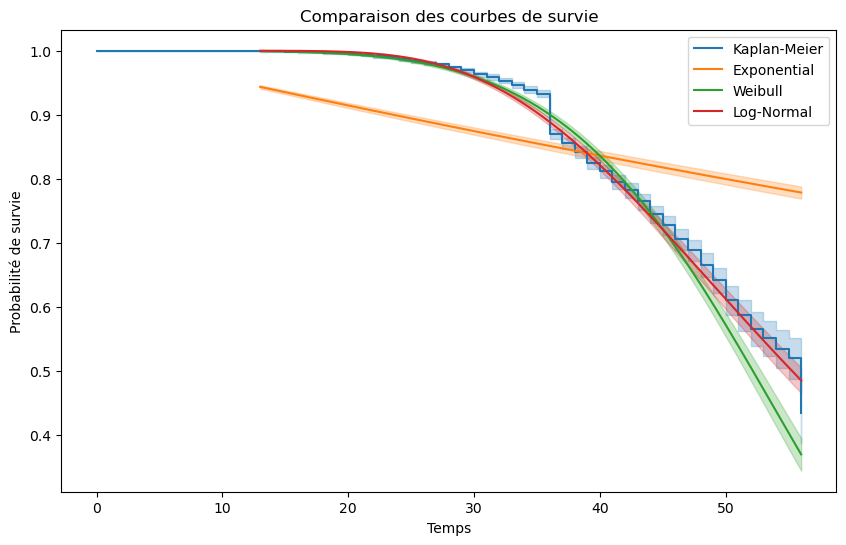

In [284]:
# Comparaison visuelle des courbes de survie des trois mod√®les

plt.figure(figsize=(10, 6))
# Courbe de survie Kaplan Meier
kmf.plot_survival_function( label='Kaplan-Meier')

# Courbe de survie du mod√®le exponentiel
exp_fitter.plot_survival_function(label="Exponential")

# Courbe de survie du mod√®le Weibull
weibull_fitter.plot_survival_function(label="Weibull")

# Courbe de survie du mod√®le Log-Normal
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(T, event_observed=C)
mu_ln = lognormal_fitter.mu_       # Param√®tre de localisation
sigma_ln = lognormal_fitter.sigma_  # Param√®tre d'√©chelle

lognormal_fitter.plot_survival_function(label="Log-Normal")

plt.title('Comparaison des courbes de survie')
plt.xlabel('Temps')
plt.ylabel('Probabilit√© de survie')
plt.legend()
plt.show()


Le mod√®le Weibull est clairement le plus adapt√© pour mod√©liser la survie dans ce cas, comme le montre l‚Äôexcellent alignement des quantiles empiriques et th√©oriques. Les mod√®les Log-Normal et Exponentiel sont moins performants, le premier √©tant acceptable mais l√©g√®rement moins pr√©cis, et le second totalement inadapt√©.

## 4) V√©rification de la validit√© du mod√®le 

## 4.1) Comparaison des courbes de survie observ√©es et pr√©dites par le mod√®le Weibul

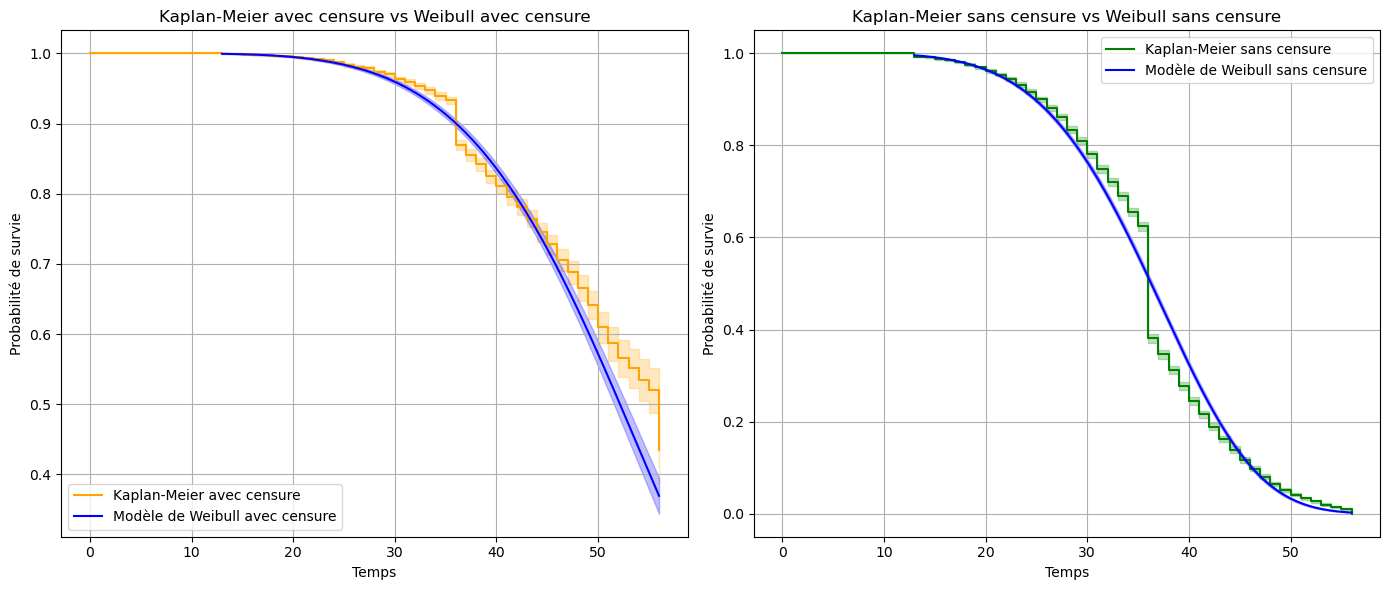

In [289]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, WeibullFitter

# Supposons que T (temps de survie) et C (variable de censure) sont d√©j√† d√©finis

# Ajustement de la courbe Kaplan-Meier avec censure
kmf_with_censorship = KaplanMeierFitter()
kmf_with_censorship.fit(T, event_observed=C, label="Kaplan-Meier avec censure")

# Ajustement de la courbe Kaplan-Meier sans censure (tous les √©v√©nements sont observ√©s)
kmf_without_censorship = KaplanMeierFitter()
kmf_without_censorship.fit(T, event_observed=[1]*len(C), label="Kaplan-Meier sans censure")

# Ajustement du mod√®le Weibull avec censure
weibull_fitter_with_censorship = WeibullFitter()
weibull_fitter_with_censorship.fit(T, event_observed=C)

# Ajustement du mod√®le Weibull sans censure (tous les √©v√©nements sont observ√©s)
weibull_fitter_without_censorship = WeibullFitter()
weibull_fitter_without_censorship.fit(T, event_observed=[1]*len(C))

# Cr√©ation de la figure avec une disposition en 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique de Kaplan-Meier avec censure vs Weibull avec censure
kmf_with_censorship.plot_survival_function(ax=axes[0], color="orange")
weibull_fitter_with_censorship.plot_survival_function(ax=axes[0], label="Mod√®le de Weibull avec censure", color="blue")
axes[0].set_title("Kaplan-Meier avec censure vs Weibull avec censure")
axes[0].set_xlabel("Temps")
axes[0].set_ylabel("Probabilit√© de survie")
axes[0].legend()
axes[0].grid(True)

# Graphique de Kaplan-Meier sans censure vs Weibull sans censure
kmf_without_censorship.plot_survival_function(ax=axes[1], color="green")
weibull_fitter_without_censorship.plot_survival_function(ax=axes[1], label="Mod√®le de Weibull sans censure", color="blue")
axes[1].set_title("Kaplan-Meier sans censure vs Weibull sans censure")
axes[1].set_xlabel("Temps")
axes[1].set_ylabel("Probabilit√© de survie")
axes[1].legend()
axes[1].grid(True)

# Affichage des graphiques
plt.tight_layout()
plt.show()


Le mod√®le de Weibul ne correspond pas parfaitement a la fonction de survie obtenue avec Kaplan Meier.

# VI) Mod√®le de Cox

Le mod√®le de Cox est un mod√®le semi-param√©trique qui utilise la m√©thode du maximum de vraisemblance partielle. Il permet de mod√©liser la fonction de risque en fonction d'un ou plusieurs covariables. Ce mod√®le est souvent utilis√© dans le cadre de l'analyse de survie.

## R√©gression et interpr√©tation

En r√©gression logistique, la fonction logit est d√©finie par :
$$
\dfrac{P(Y=1)}{P(Y=0)} = \log\left(\dfrac{P(Y=1)}{1-P(Y=1)}\right) = \text{logit}(P(Y=1))
$$

### Formulation du mod√®le de Cox

- Soit \( Z \) une variable binaire repr√©sentant deux groupes :
  $$
  Z = 
  \begin{cases} 
      1 & \text{groupe A} \\
      0 & \text{groupe B}
  \end{cases}
  $$

- La fonction de risque du mod√®le de Cox s‚Äô√©crit :
  $$
  h(t) = h_0(t) \times e^{\beta Z}
  $$

  o√π \( h_0(t) \) est le risque de base (fonction de risque lorsque \( Z = 0 \)) et \( \beta \) est le param√®tre estim√© pour la variable \( Z \).

### Hazard Ratio (HR)

L'Hazard Ratio (HR) est d√©fini comme le rapport des risques pour les deux groupes :

$$
HR = \frac{h(t \mid Z=1)}{h(t \mid Z=0)} = e^\beta
$$

### Interpr√©tation de $HR$

- $\beta = 0 \quad \Longleftrightarrow \quad HR = 1 \quad \Longleftrightarrow \quad \text{risques √©gaux pour les deux groupes}$
- $\beta > 0 \quad \Longleftrightarrow \quad HR > 1 \quad \Longleftrightarrow \quad \text{risque plus √©lev√© dans le groupe A (de $e^\beta$)}$
- $\beta < 0 \quad \Longleftrightarrow \quad HR < 1 \quad \Longleftrightarrow \quad \text{risque moins √©lev√© dans le groupe A (de $e^\beta$)}$

## 1) Proportional_hazard_test sur la variable Sexe_Client:

Le test **`proportional_hazard_test`** est utilis√© pour v√©rifier si les covariables respectent l'hypoth√®se des risques proportionnels dans le mod√®le de Cox. Cette hypoth√®se est cruciale, car elle suppose que les effets des covariables sur le risque sont constants dans le temps. Si une variable ne respecte pas cette hypoth√®se, elle pourrait introduire un biais dans l'analyse. Ce test permet ainsi de valider la pertinence et la stabilit√© des variables incluses dans le mod√®le.


| **Hypoth√®se**             | **Signification**                          | **Limite de p-value** |
|----------------------------|-----------------------------------------------|----------------------|
| **\( H0 \) :** Pas de relation ou d'effet. | Les variables √©tudi√©es n'ont aucun effet significatif. | \( p > 0.05 \) |
| **\( H1 \) :** Pr√©sence d'une relation ou d'effet. | Les variables √©tudi√©es ont un effet significatif. | \( p < 0.05 \)
:

### 1.1) Test graphique de la fonction de survie

<Axes: >

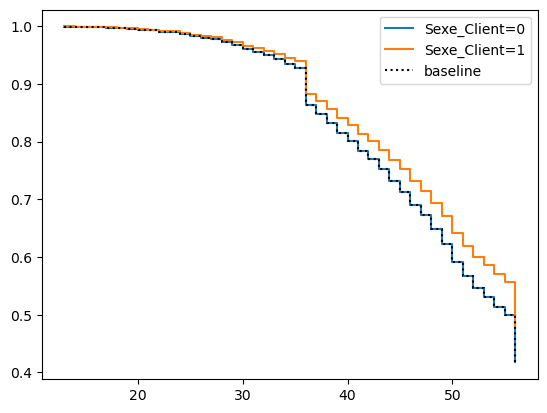

In [294]:
# 4. V√©rification des hypoth√®ses
# 4.1 Test graphique
# Importation des biblioth√®ques
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# 3.1 Sp√©cification du mod√®le
# Pr√©parer les donn√©es avec les variables pertinentes
df_cph = df[['Anciennete_Client', 'Censure', 'Sexe_Client']].copy()

# 3.2 Ajustement du mod√®le
cph = CoxPHFitter()
cph.fit(df_cph, duration_col='Anciennete_Client', event_col='Censure')
cph.plot_partial_effects_on_outcome(covariates='Sexe_Client', values=[0, 1], plot_baseline=True)



### 1.2) Test graphique risque cumul√©

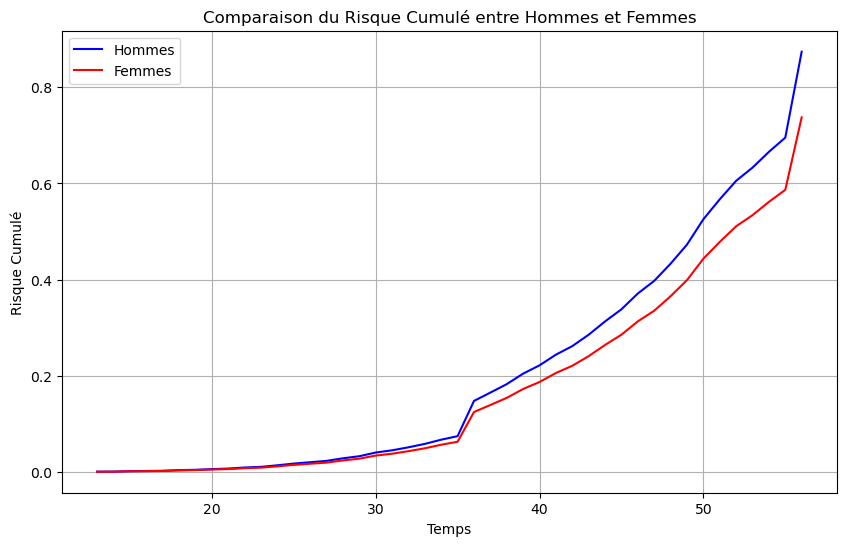

In [297]:
# Importation des biblioth√®ques n√©cessaires
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# 3.1 Sp√©cification du mod√®le
# Pr√©parer les donn√©es avec les variables pertinentes
df_cph = df[['Anciennete_Client', 'Censure', 'Sexe_Client']].copy()

# 3.2 Ajustement du mod√®le
cph = CoxPHFitter()
cph.fit(df_cph, duration_col='Anciennete_Client', event_col='Censure')

# 4. V√©rification des hypoth√®ses : Risque cumul√©
# Pr√©voir le risque cumul√© pour les clients masculins (Sexe_Client = 0) et f√©minins (Sexe_Client = 1)
df_masculin = df_cph[df_cph['Sexe_Client'] == 0]
df_feminin = df_cph[df_cph['Sexe_Client'] == 1]

# Pr√©diction du risque cumul√© pour chaque groupe
cumulative_hazard_masculin = cph.predict_cumulative_hazard(df_masculin)
cumulative_hazard_feminin = cph.predict_cumulative_hazard(df_feminin)

# Tracer les courbes du risque cumul√©
plt.figure(figsize=(10, 6))

# Courbe pour les hommes
plt.plot(cumulative_hazard_masculin.index, cumulative_hazard_masculin.mean(axis=1), label='Hommes', color='blue')

# Courbe pour les femmes
plt.plot(cumulative_hazard_feminin.index, cumulative_hazard_feminin.mean(axis=1), label='Femmes', color='red')

# Ajouter des l√©gendes et des titres
plt.title('Comparaison du Risque Cumul√© entre Hommes et Femmes')
plt.xlabel('Temps')
plt.ylabel('Risque Cumul√©')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


### 1.3) Test Log-Rank

**Formulation Math√©matique pour 2 groupes**

La statistique de test est d√©finie par :

$$ 
Z_i = \frac{\sum^{J}_{j=1} (O_{ij} - E_{ij})^2}{\sqrt{\sum^{J}_{j=1} V_{ij}}}, \,\,\, i = 1, 2
$$

*   $O_{ij}$ le nombre d'√©v√©nements observ√©s dans le groupe $i$ au moment $j$

Sous $H_O$, $O_{ij}$ suit une distribution hyperg√©om√©trique de param√®tres $N_j$, $N_{ij}$, $O_j$ et dont l'esp√©rance et la variance sont :
  
   $E_{ij} = N_{i,j} \frac{O_j}{N_j}$ et   $V_{ij} = E_{ij}(\frac{N_j - O_j}{N_j}) (\frac{N_j - N_{ij}}{N_j - }) $


On peut g√©n√©raliser ce test √†  $n$ groupes.

$$ H_0 : h_1(t) =h_2(t)= ... = h_n(t) \,\, \,\, vs  \,\, \,\,  H_1: \,\, il \,\, existe \,\, au \,\,moins \,\, un \,\, groupe \,\, qui \,\,diff√®re \,\, des \,\, autres $$

In [300]:
# Importation des biblioth√®ques n√©cessaires
from lifelines.statistics import logrank_test

# 3.1 Pr√©parer les donn√©es
# Supposez que Sexe_Client = 0 pour les hommes et 1 pour les femmes
group_men = df[df['Sexe_Client'] == 0]
group_women = df[df['Sexe_Client'] == 1]

# 3.2 Test de log-rank
# Le test n√©cessite les colonnes de dur√©e et d'√©v√©nement (censure)
results = logrank_test(
    group_men['Anciennete_Client'], group_women['Anciennete_Client'],
    event_observed_A=group_men['Censure'], event_observed_B=group_women['Censure']
)

# 3.3 Affichage des r√©sultats
print("Test de log-rank entre hommes et femmes")
print(f"p-value: {results.p_value}")
print(f"Statistique du test: {results.test_statistic}")

# Interpr√©tation bas√©e sur la p-value
if results.p_value < 0.05:
    print("Il y a une diff√©rence significative entre les courbes de survie des hommes et des femmes.")
else:
    print("Aucune diff√©rence significative entre les courbes de survie des hommes et des femmes.")


Test de log-rank entre hommes et femmes
p-value: 0.0007569390005867569
Statistique du test: 11.343956229540883
Il y a une diff√©rence significative entre les courbes de survie des hommes et des femmes.


Il y a une diff√©rence significative entre les courbes de survie des hommes et des femmes d'apr√®s le test de log-rank.

## 2) Ajustement du mod√®le

In [304]:
# 3.2 Ajustement du mod√®le
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10127 total observations, 8500 right-censored observations>
             duration col = 'Anciennete_Client'
                event col = 'Censure'
      baseline estimation = breslow
   number of observations = 10127
number of events observed = 1627
   partial log-likelihood = -13490.50
         time fit was run = 2025-01-18 21:10:52 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
Sexe_Client -0.17      0.84      0.05           -0.27           -0.07                0.76                0.93

             cmp to     z      p  -log2(p)
covariate                                 
Sexe_Client    0.00 -3.39 <0.005     10.48
---
Concordance = 0.52
Partial AIC = 26982.99
log-likelihood ratio test = 11.57 on 1 df
-log2(p) of ll-ratio test = 10.54

## 3) V√©rification des hypoth√®ses


### 3.1) Tests statistiques

In [308]:
# 4.2 Test statistique
results = proportional_hazard_test(cph, df_cph, time_transform="rank")
print(results.summary)

# 5. Interpr√©tation des r√©sultats
# Les coefficients Œ≤ et HR sont inclus dans le r√©sum√©
# Les variables significatives (p-value < 0.05) sont √† noter

             test_statistic         p  -log2(p)
Sexe_Client        0.000252  0.987326  0.018402


### 3.2) Comparaison des mod√®les avec et sans covariables

Comparaison des crit√®res AIC et BIC

In [311]:
# Crit√®res AIC et log-vraisemblance pour Cox
AIC_cox = cph.AIC_partial_
log_likelihood_cox = cph.log_likelihood_
print(f"AIC Cox: {AIC_cox}")

# Afficher les crit√®res pour les trois 
print("\nComparaison des mod√®les :")
print(f"Weibull avec censure : AIC = {AIC_weibull_cens}, BIC = {BIC_weibull_cens}")
print(f"Weibull sans censure : AIC = {AIC_weibull_no_cens}, BIC = {BIC_weibull_no_cens}")
print(f"Cox : AIC = {AIC_cox}")

# Identifier le mod√®le avec le meilleur AIC

if AIC_weibull_cens < AIC_weibull_no_cens and AIC_weibull_cens < AIC_cox:
    print("Le mod√®le Weibull avec censure est le meilleur selon l'AIC.")
elif AIC_weibull_no_cens < AIC_weibull_cens and AIC_weibull_no_cens < AIC_cox:
    print("Le mod√®le Weibull sans censure est le meilleur selon l'AIC.")
else:
    print("Le mod√®le de Cox est le meilleur selon l'AIC.")

AIC Cox: 26982.994835991834

Comparaison des mod√®les :
Weibull avec censure : AIC = 17241.53487136317, BIC = 17255.980792169834
Weibull sans censure : AIC = 11329.205390020263, BIC = 11339.994376234701
Cox : AIC = 26982.994835991834
Le mod√®le Weibull sans censure est le meilleur selon l'AIC.


## Conclusion Mod√®le Cox

Le mod√®le de Cox a √©t√© ajust√© avec **`lifelines.CoxPHFitter`** en utilisant comme dur√©e `'Anciennete_Client'` et comme √©v√©nement `'Censure'`. L'estimation de la baseline a √©t√© r√©alis√©e avec la m√©thode de **Breslow**, et le mod√®le inclut un total de **10 127 observations**, dont **1 627 √©v√©nements observ√©s**. Le coefficient associ√© √† la variable **Sexe_Client** est significatif avec une p-value inf√©rieure √† **0.005**, indiquant un impact sur la probabilit√© d'√©v√©nements. Le score de concordance est de **0.52**, et le test du log-vraisemblance donne une valeur de **11.57** avec un p significatif.


La p-value obtenue pour la variable **Sexe_Client** est tr√®s √©lev√©e (**p = 0.987**), ce qui indique qu'il n'y a pas de diff√©rence statistiquement significative entre les groupes masculins et f√©minins concernant la variable d'int√©r√™t. Le test statistique montre que l'hypoth√®se nulle ne peut pas √™tre rejet√©e. Ainsi, le sexe n'a pas d'impact significatif sur le ph√©nom√®ne √©tudi√©.


# Conclusion

L‚Äôanalyse des comportements de d√©sertion bancaire √† travers notre meilleur mod√®le (Weibull) met en lumi√®re des tendances significatives dans la fid√©lit√© des clients au fil du temps. Nous constatons qu‚Äôau cours des premiers mois, la probabilit√© de conserver un client reste √©lev√©e, mais elle diminue de fa√ßon progressive apr√®s une certaine p√©riode critique.

Environ la moiti√© des clients quittent la banque avant le 40·µâ mois, comme l‚Äôindique le point m√©dian de la courbe. Cette observation souligne l‚Äôexistence d‚Äôune fen√™tre temporelle cl√© durant laquelle les actions de fid√©lisation peuvent √™tre les plus efficaces pour ralentir la d√©sertion.

En fin de p√©riode (apr√®s 50 mois), la probabilit√© de survie des clients devient extr√™mement faible, confirmant que, sans intervention proactive, une large partie de la client√®le est susceptible de quitter la banque dans un horizon pr√©visible.